In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pf

#to display all columns in the dataset
pd.pandas.set_option('display.max_columns',None)

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
# data importing, understanding and merging

In [4]:
cust_demo = pd.read_excel('CustomerDemographics.xlsx')

In [5]:
cust_demo.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [6]:
cust_demo.tail()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0
19999,13730,current,F,118,LOW,78.4,7,882.0,1,10.0


In [7]:
cust_demo.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
dtype: object

In [8]:
cust_demo.duplicated().sum()

0

In [9]:
cust_demo.isnull().sum()

ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    3
dtype: int64

In [10]:
cust_behav = pd.read_excel('CustomerBehaviorData.xlsx')

In [11]:
cust_behav.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [12]:
cust_behav.tail()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.0,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.0,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.0,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.0,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29
19999,12413,26218.000,6615.00,2832.00,4642.00,1314.64,11355.00,7.0,1,84,3,18,34,576000,1,1,1.0,1,250631.80,1425000.00,678.0,8723.0,92495.11,74665.00,68.0,1,41531.0,166641.35,142612.61,7,13,22831.0,60035.50,76669.00,9,64,96213.0,Y,793.41


In [13]:
cust_behav.dtypes

ID                         int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may               int64
cc_count_jun               int64
dc_count_apr               int64
dc_count_may               int64
dc_count_jun               int64
card_lim                   int64
personal_loan_active       int64
vehicle_loan_active        int64
personal_loan_closed     float64
vehicle_loan_closed        int64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr           int64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_count_may           int64
debit_coun

In [14]:
cust_behav.duplicated().sum()

0

In [15]:
cust_behav.isnull().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [16]:
cred_cosm_data = pd.read_excel('CreditConsumptionData.xlsx')

In [17]:
cred_cosm_data.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [18]:
cred_cosm_data.tail()

,ID,cc_cons
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN
19999,12413,NaN


In [19]:
cred_cosm_data.dtypes

ID           int64
cc_cons    float64
dtype: object

In [20]:
cred_cosm_data.duplicated().sum()

0

In [21]:
cred_cosm_data.isnull().sum()

ID            0
cc_cons    5000
dtype: int64

In [22]:
data = pd.merge(cust_demo, cust_behav, on='ID', how='inner')

In [23]:
data_final = pd.merge(data, cred_cosm_data, on='ID', how='inner')

In [24]:
# where cc_cons have missing value we define it as new data, and will predit those values as the part of this project
new_data = data_final[data_final.cc_cons.isnull()]

# where cc_cons doesnot have missing value we define it as historical data & we use this historical data to build the modle
hist_data = data_final[~data_final.cc_cons.isnull()]

In [25]:
hist_data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,1,1,1.0,1,593.200,1244.14,787.0,6885.00000,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.00,2,65,50836.00,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,21,31,127500,1,1,1.0,1,213557.150,172678.56,90525.0,1500.00000,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.00,21,63,23226.00,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,1,1,1.0,1,165907.570,470000.00,25524.0,3735.00000,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.00,7,1,27036.00,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,1,1,1.0,1,81872.650,223379.40,48500.0,-4679.00000,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.00,21,83,43037.00,Y,3544.33,7707.0
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,1,1,1.0,1,568.800,385000.00,183999.0,6916.00000,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.00,8,32,32044.00,NaN,12780.44,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,6995,current,F,53,LOW,13.2,9,653.0,1,20.0,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0
15107,10376,current,M,44,MEDIUM,2.4,9,535.0,1,2.0,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0
15108,2181,current,M,37,MEDIUM,3.4,9,464.0,1,8.0,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0
15109,18417,current,M,220,MEDIUM,40.0,10,536.0,1,3.0,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0


In [26]:
new_data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.00,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.00,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.00,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.00,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.00,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,4611.00,12015.50,69121.74,550.50,400.00,828.04,5.0,43,9,39,25,42,255000,1,1,1.0,1,199690.50,152664.00,51520.0,13135.0,39148.00,56225.00,29.0,35,29730.00,179983.00,61078.00,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,9545.00,2061.00,4269.27,901.00,7977.50,5299.00,1.0,30,30,8,5,22,518000,1,1,1.0,1,3938.25,1752254.00,15477.0,4856.0,90755.10,26953.00,5.0,13,22103.00,17754.66,37545.00,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,2028.93,9454.99,11019.00,4774.50,793.08,83247.00,6.0,6,1,2,4,13,359000,1,1,1.0,1,65640.00,64309.52,13873.0,2008.0,275542.16,26327.00,11.0,3,44500.00,22093.59,48230.00,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,11456.23,3999.00,2650.08,290.00,21111.50,11827.46,5.0,6,117,4,9,2,523000,1,1,1.0,1,47936.43,11982.00,3975.0,2351.0,60498.50,12276.00,5.0,26,52612.00,23546.48,112616.76,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


### EDA - Data Analysis/Data Audit

- Data check at table level

In [27]:
# checking the number of rows and columns

print('number of rows :',hist_data.shape[0])
print('number of columns :',hist_data.shape[1])

number of rows : 15000
number of columns : 49


In [28]:
# does data have any duplicates

hist_data.duplicated().sum()

0

In [29]:
# we can see that data doesnot have any duplicates

In [30]:
# information about the data

hist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   account_type                  15000 non-null  object 
 2   gender                        15000 non-null  object 
 3   age                           15000 non-null  int64  
 4   Income                        15000 non-null  object 
 5   Emp_Tenure_Years              15000 non-null  float64
 6   Tenure_with_Bank              15000 non-null  int64  
 7   region_code                   15000 non-null  float64
 8   NetBanking_Flag               15000 non-null  int64  
 9   Avg_days_between_transaction  14999 non-null  float64
 10  cc_cons_apr                   15000 non-null  float64
 11  dc_cons_apr                   15000 non-null  float64
 12  cc_cons_may                   15000 non-null  float64
 13 

- data checks at each column level

In [31]:
# checking columns names are appropriate or not

hist_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [32]:
# all the columns names are appropriate

In [33]:
hist_data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,1,1,1.0,1,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,21,31,127500,1,1,1.0,1,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,1,1,1.0,1,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,1,1,1.0,1,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,1,1,1.0,1,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44,96408.0


In [34]:
# checking any mismatch in the data types

hist_data.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64


In [35]:
# there are no mismatch in the data types

In [36]:
# checking for missing values
# list of features which has missing values

features_with_na = [feature for feature in hist_data.columns if hist_data[feature].isnull().sum()>=1]
features_with_na

['Avg_days_between_transaction',
 'cc_count_apr',
 'personal_loan_closed',
 'investment_3',
 'debit_count_apr',
 'loan_enq',
 'emi_active']

In [37]:
# describing the data

hist_data.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.0,14999.0,15000.0,1.500000e+04,1.500000e+04,14998.000000,15000.000000,1.500000e+04,1.500000e+04,14999.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04,15000.000000
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.489499,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,1.0,1.0,1.0,1.0,6.194140e+05,2.333642e+05,44440.944719,3523.049025,6.823421e+04,8.079761e+04,36.402227,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04,55157.729867
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.435394,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,0.0,0.0,0.0,0.0,3.087815e+06,4.073237e+05,88117.933782,7373.355434,1.126786e+05,1.989060e+05,30.701081,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05,97670.972252
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,1.0,1.0,1.0,1.0,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,6768.000000
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,1.0,1.0,1.0,1.0,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03,13364.000000
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.0,1.0,1.0,1.0,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.536829e+04,8.593500e+04,52.000000,19.000

In [38]:
# print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature,':',np.round(hist_data[feature].isnull().mean(), 4),'% missing values')

Avg_days_between_transaction : 0.0001 % missing values
cc_count_apr : 0.0001 % missing values
personal_loan_closed : 0.0001 % missing values
investment_3 : 0.0001 % missing values
debit_count_apr : 0.0001 % missing values
loan_enq : 0.0001 % missing values
emi_active : 0.0001 % missing values


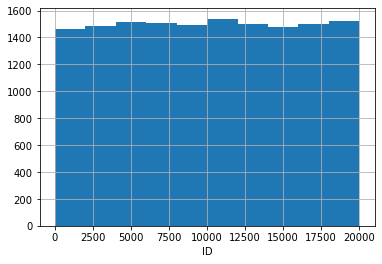

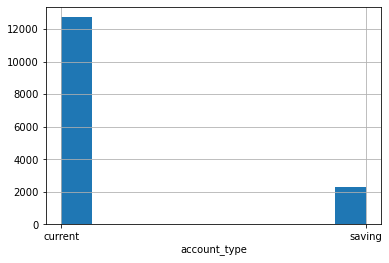

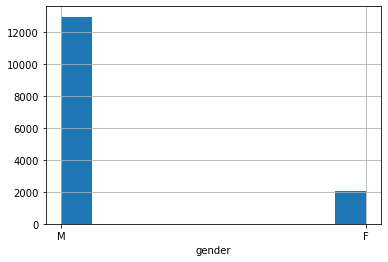

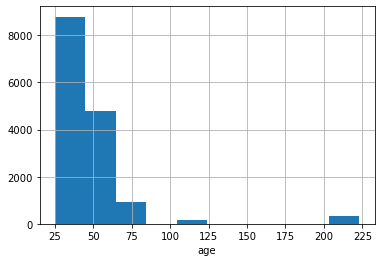

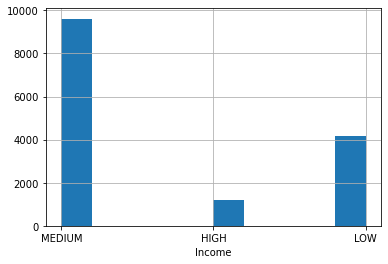

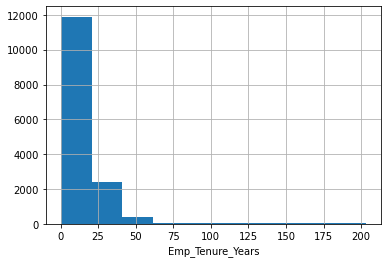

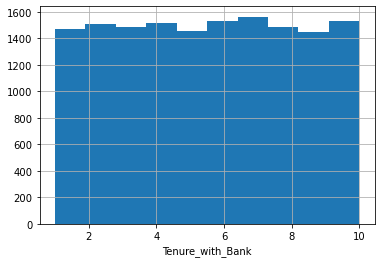

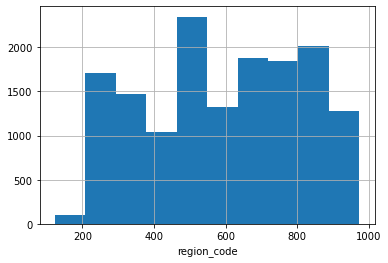

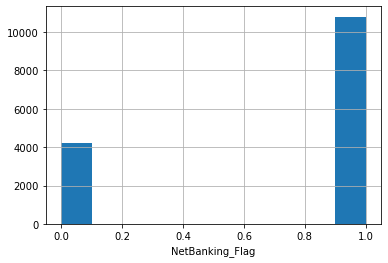

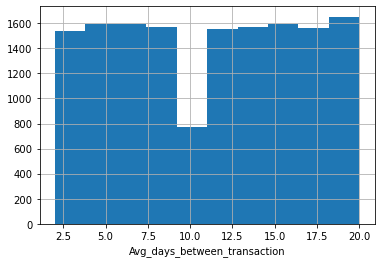

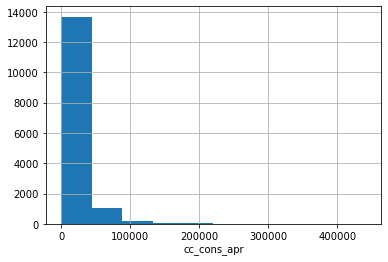

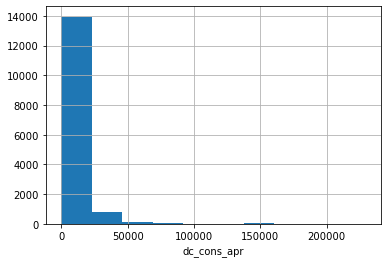

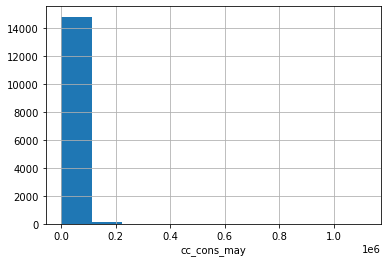

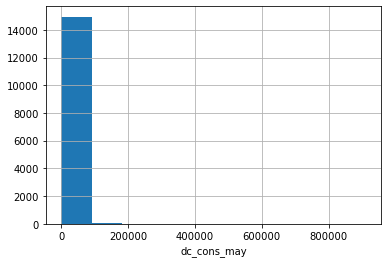

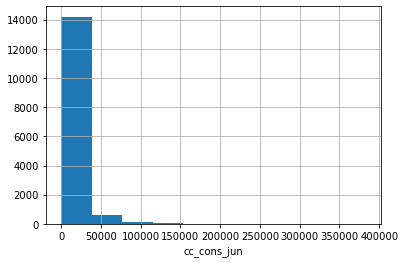

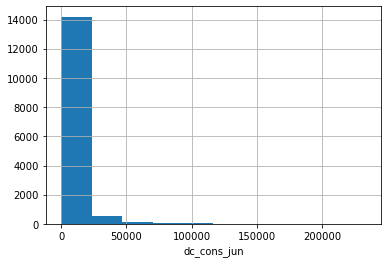

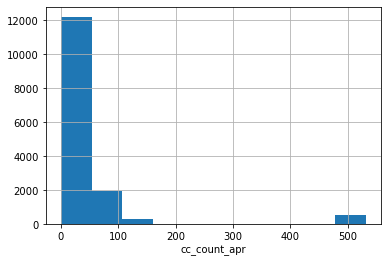

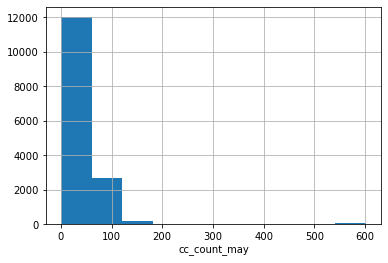

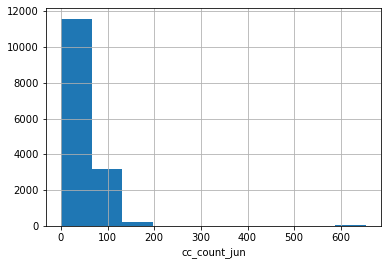

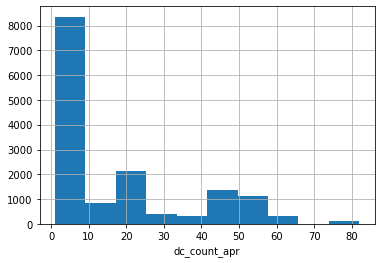

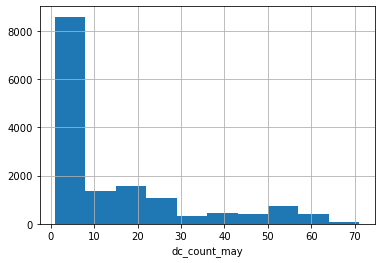

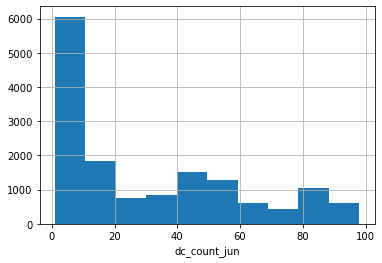

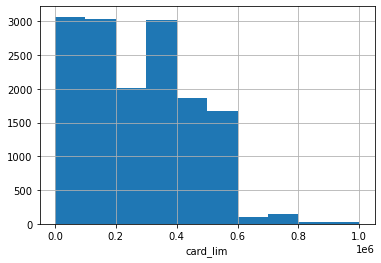

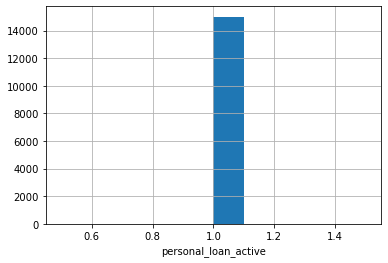

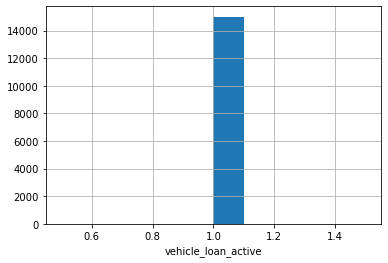

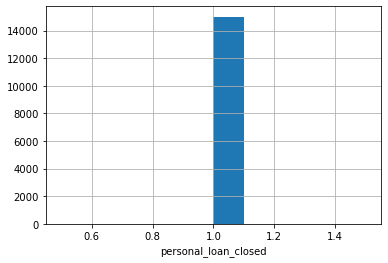

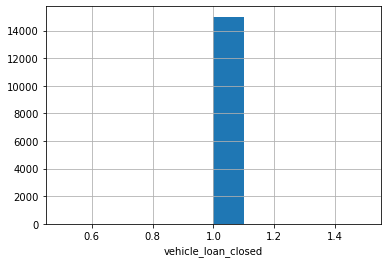

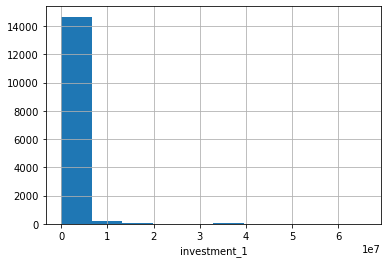

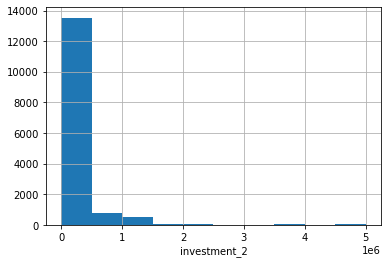

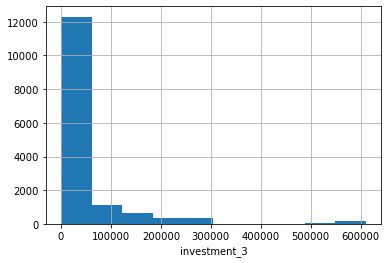

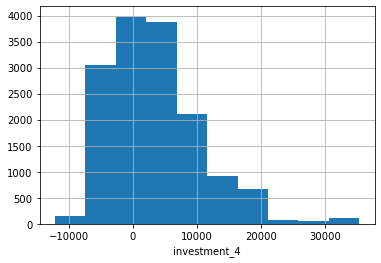

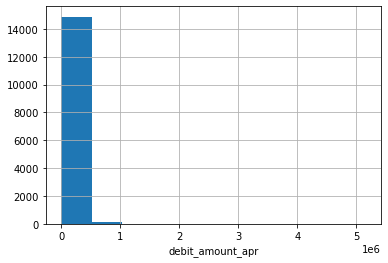

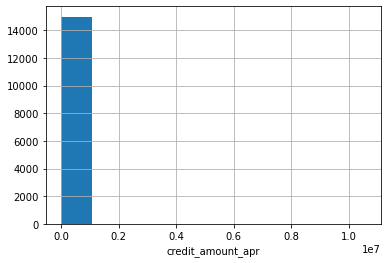

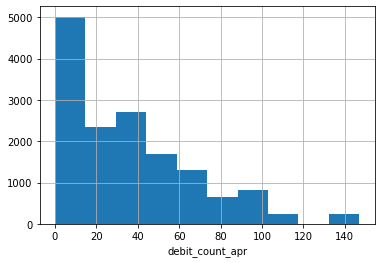

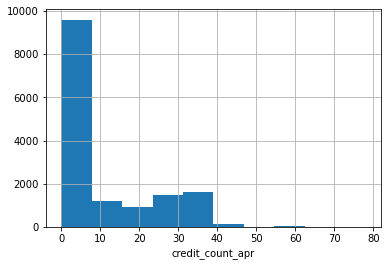

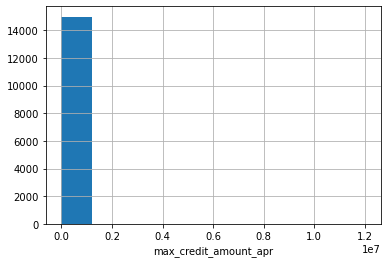

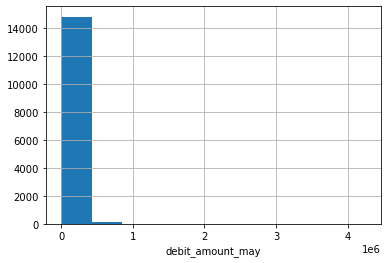

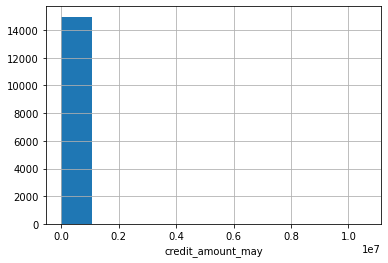

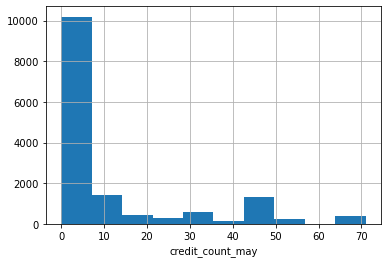

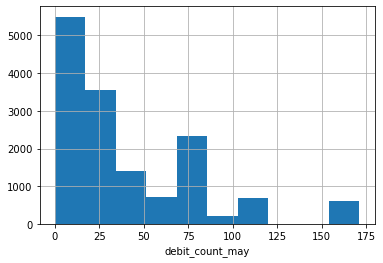

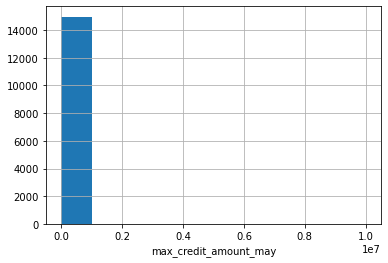

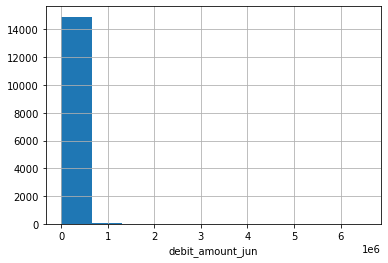

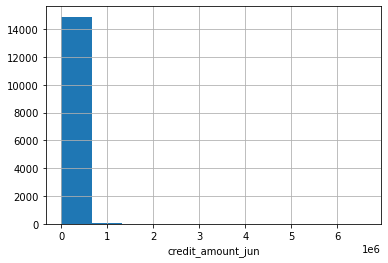

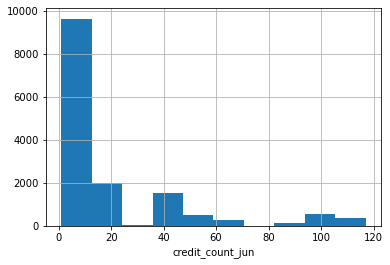

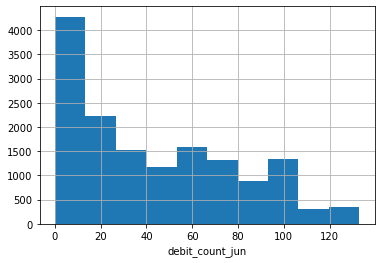

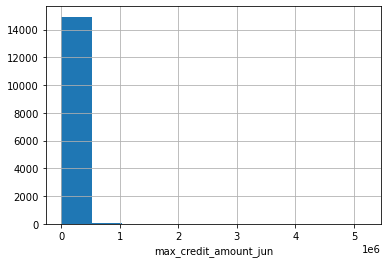

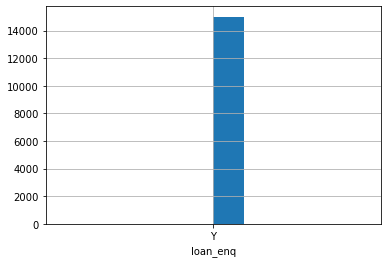

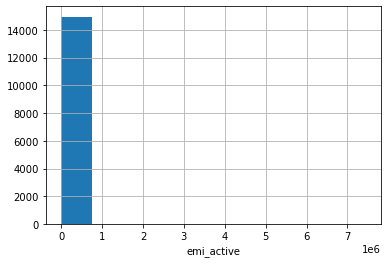

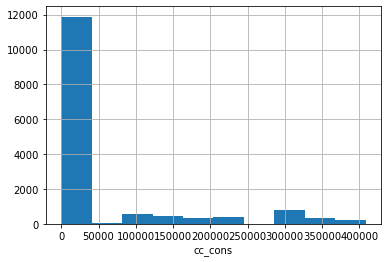

In [39]:
# univariate analysis

for feature in hist_data.columns:
    hist_data[feature].hist()
    plt.xlabel(str(feature))
    plt.show()
    

In [40]:
# understanding from above plot

# 1. ID is key variable whih has unique observation throughout the data
# 2. account_type have 2 categories current and saving, in that customers having current account_type are higher than saving
# 3. gender have 2 categories M & F, male customers are higher than feamale
# 4. Income have 3 categores LOW, MEDIUM, HIGH, in that customer having MEDIUM Income are ore compared to LOW & HIGH

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


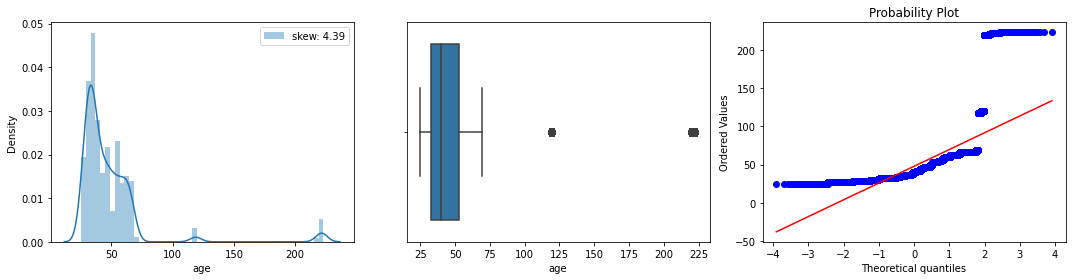

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


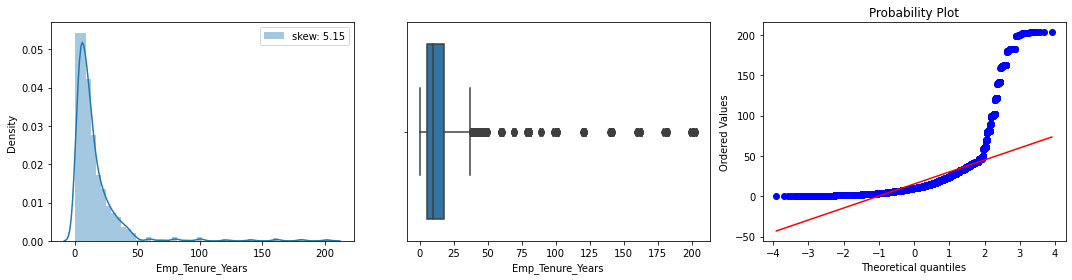

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


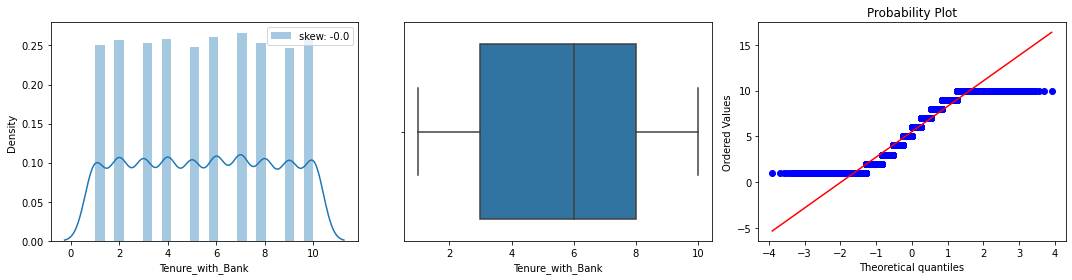

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


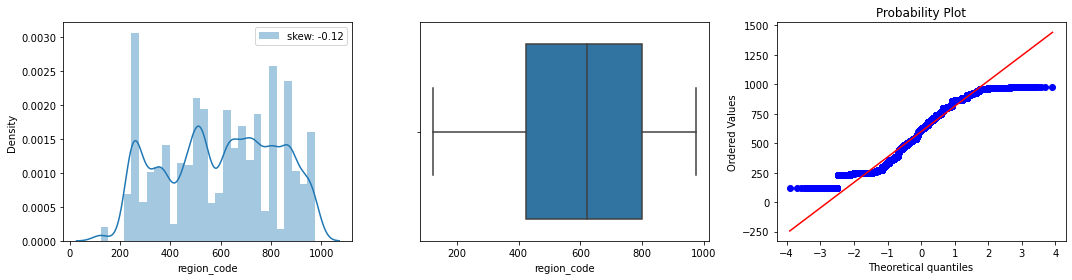

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


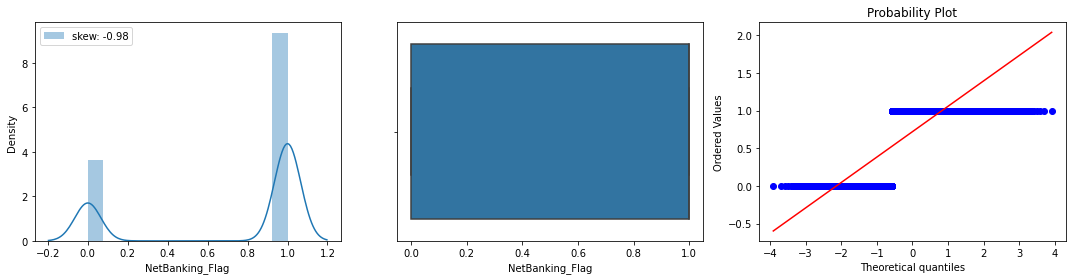

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


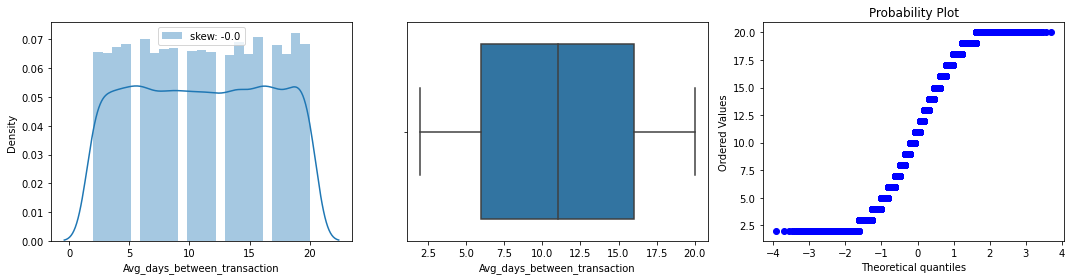

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


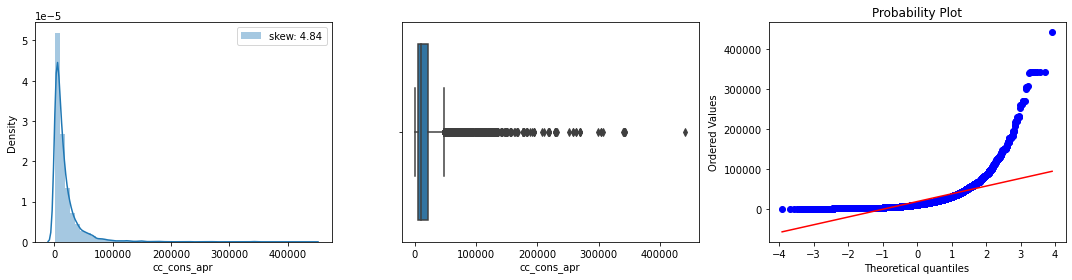

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


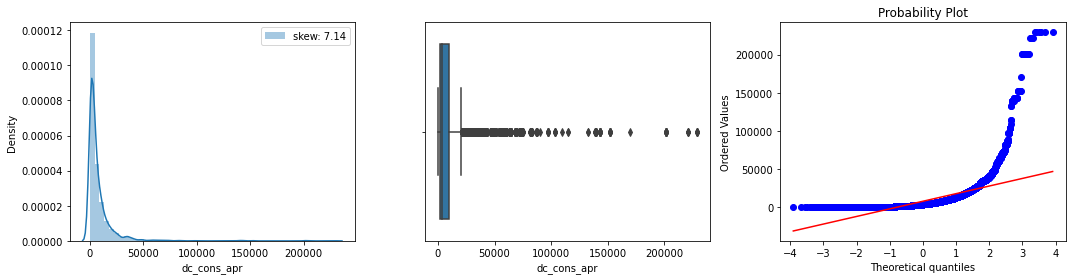

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


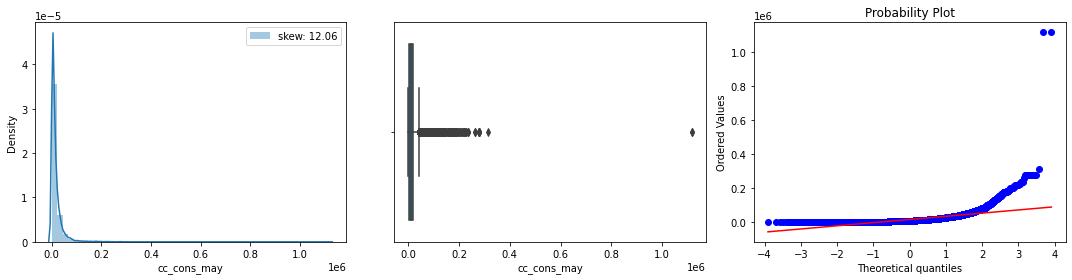

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


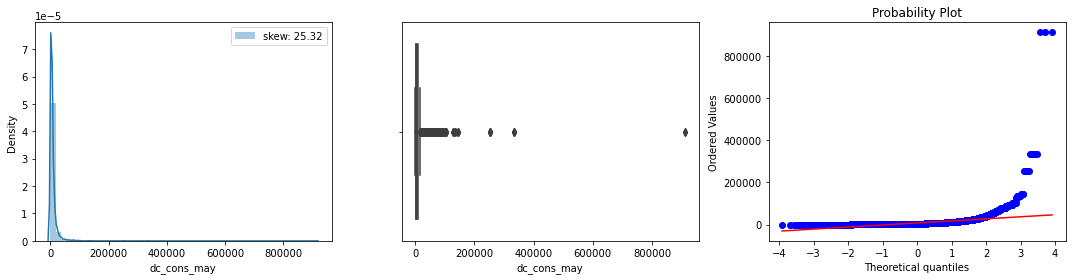

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


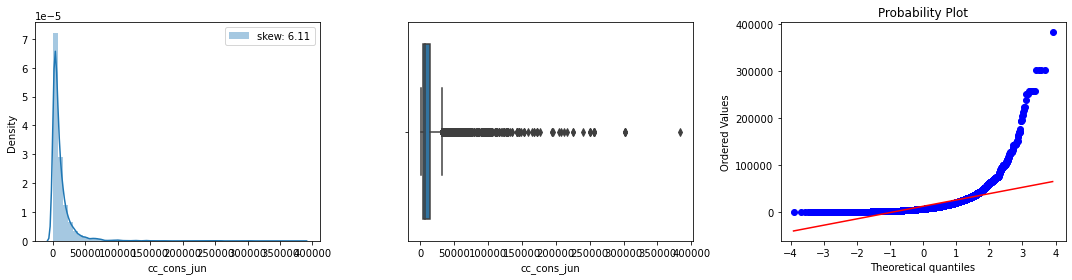

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


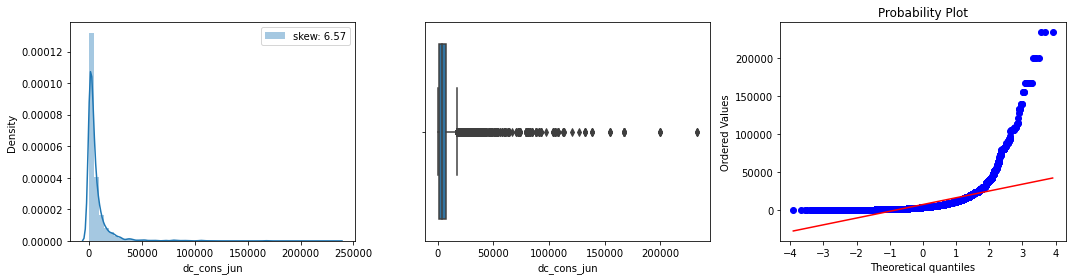

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


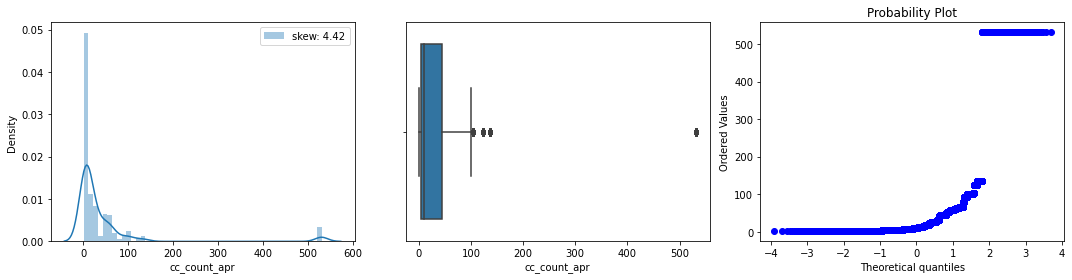

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


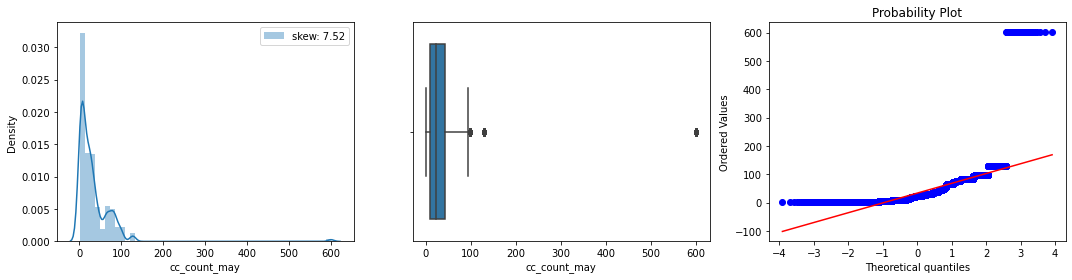

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


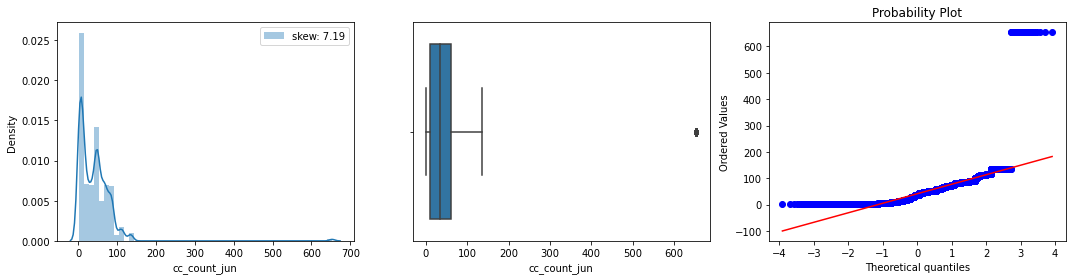

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


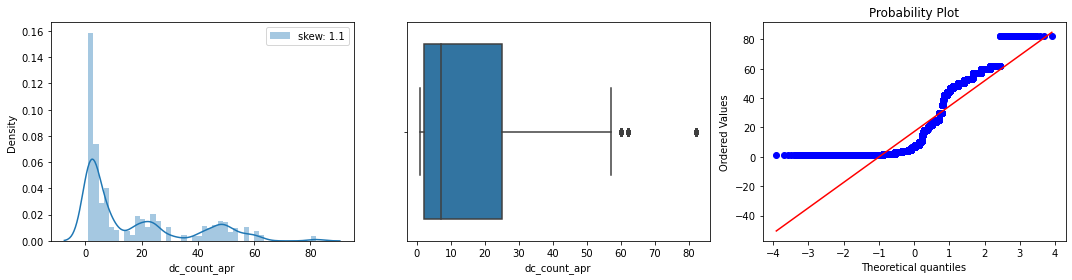

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


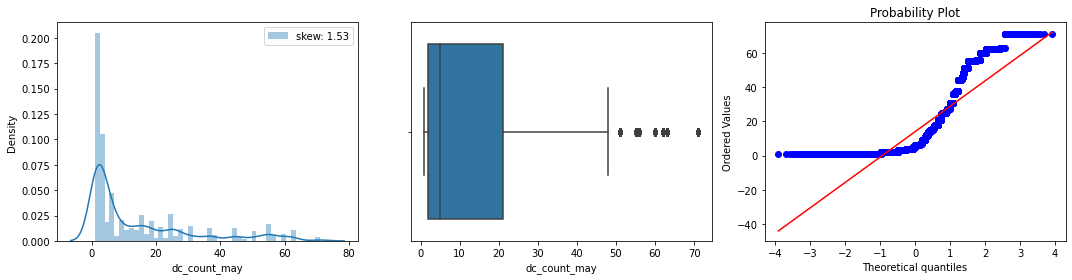

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


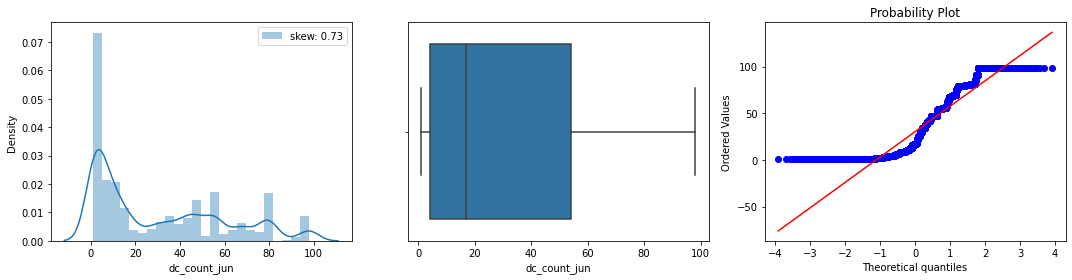

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


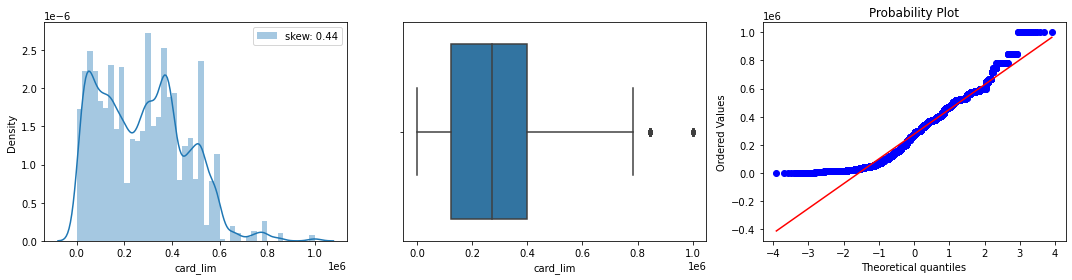

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


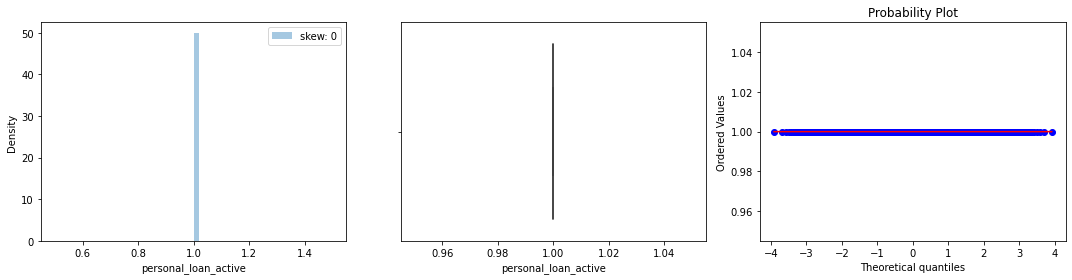

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


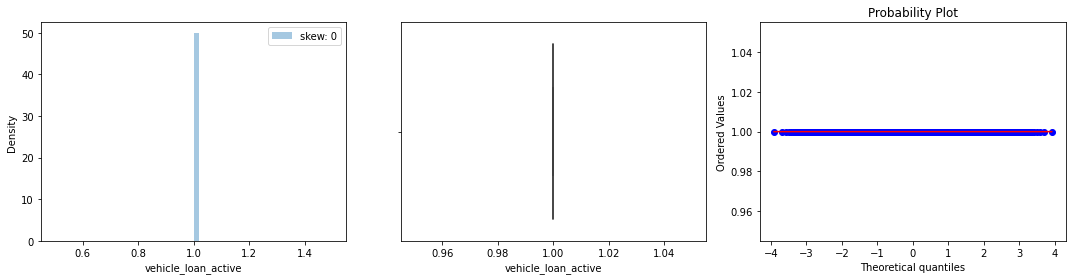

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


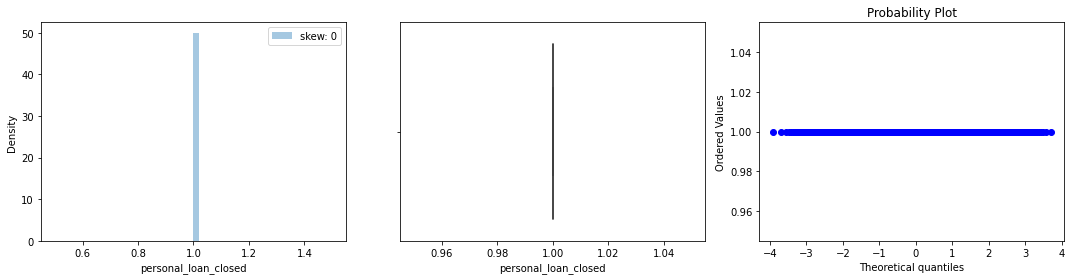

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


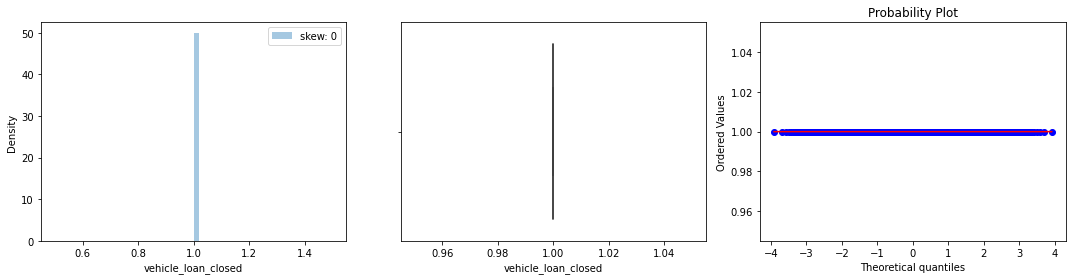

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


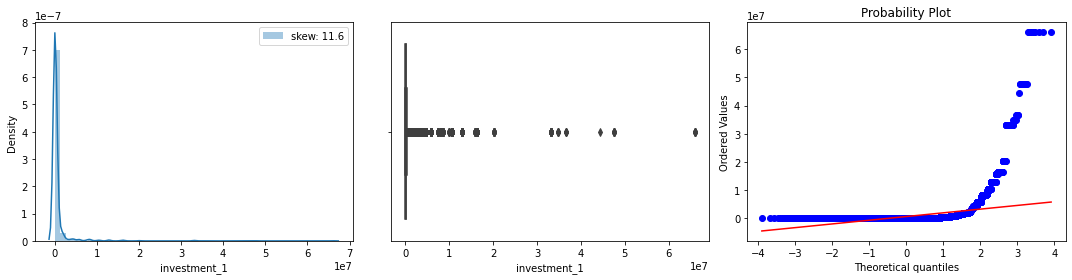

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


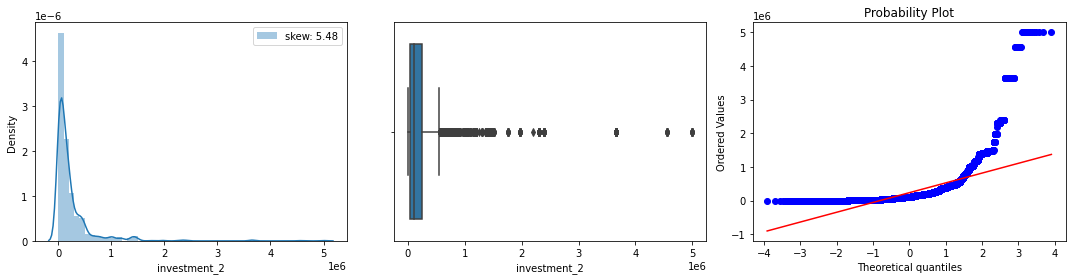

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


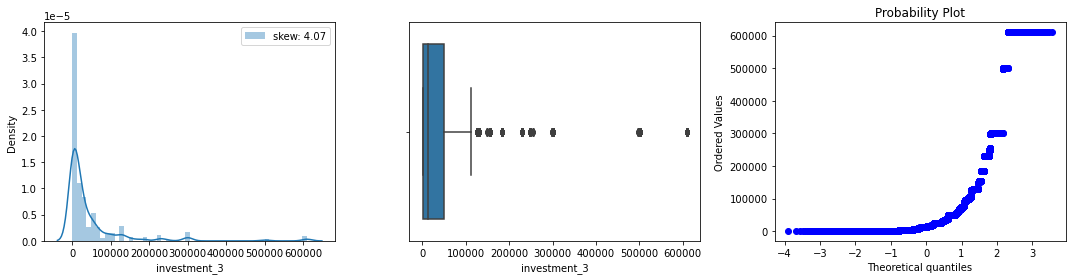

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


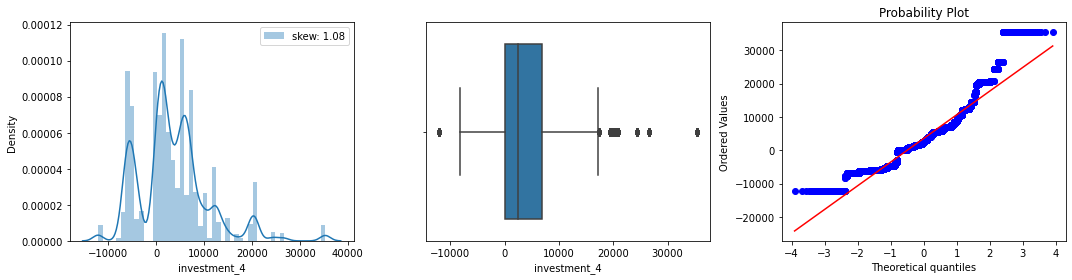

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


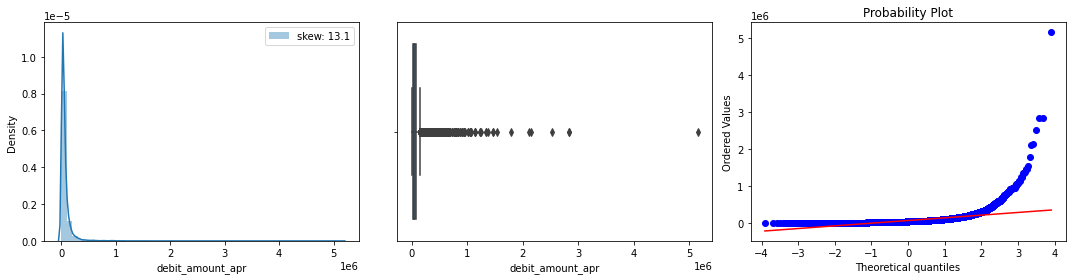

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


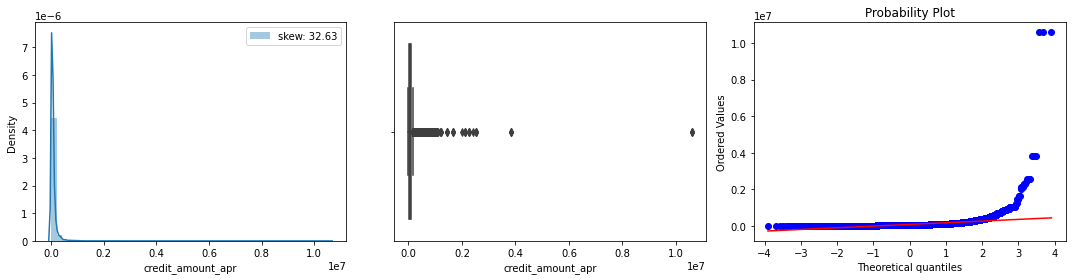

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


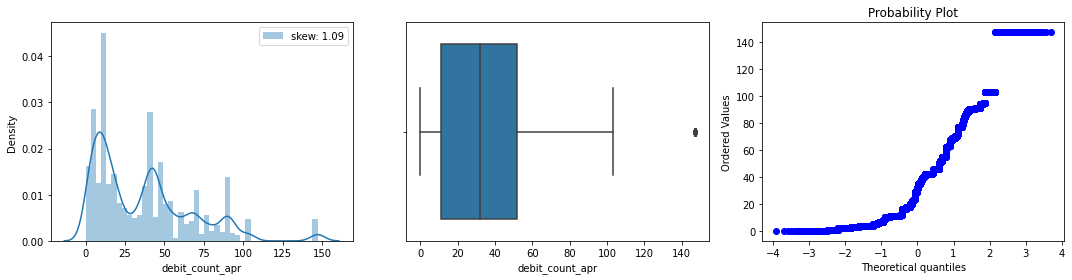

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


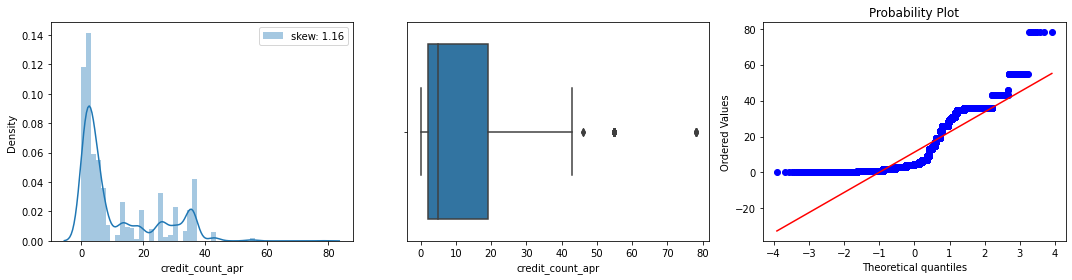

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


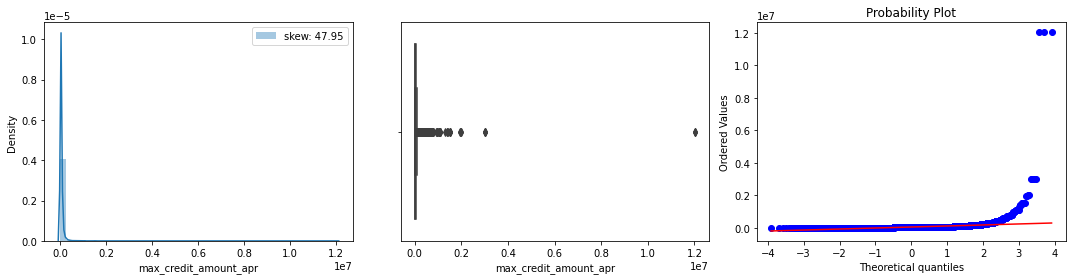

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


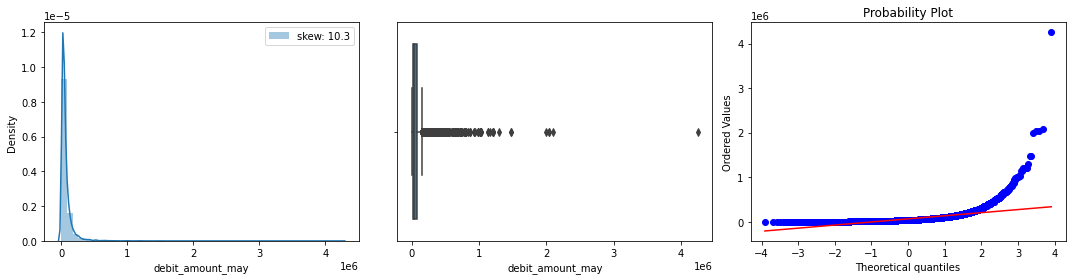

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


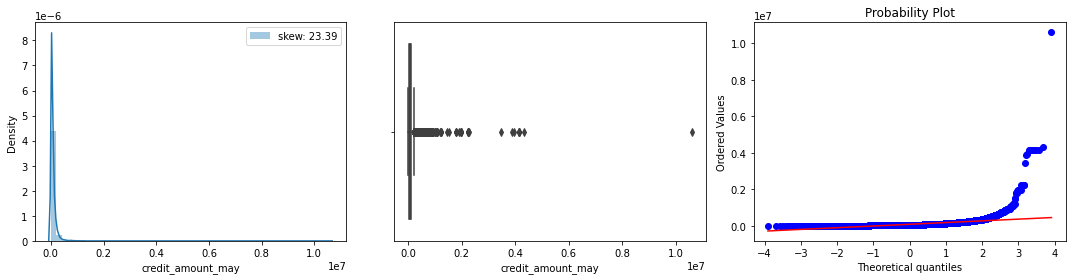

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


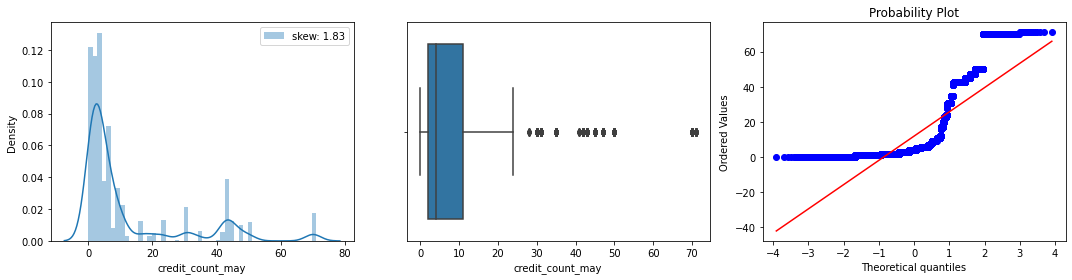

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


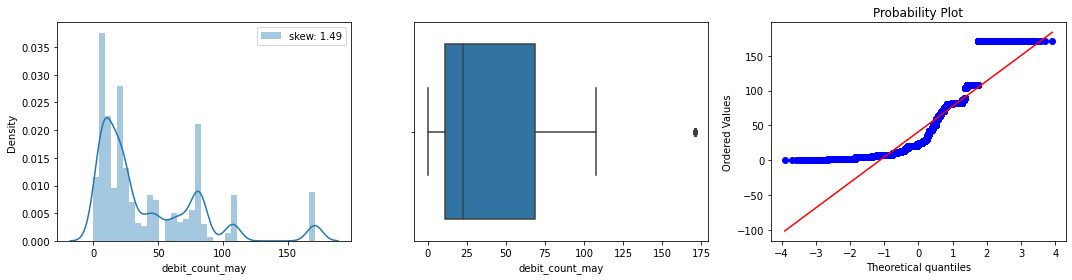

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


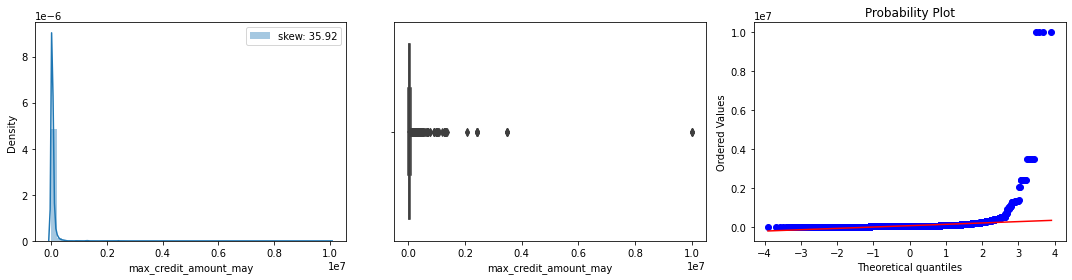

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


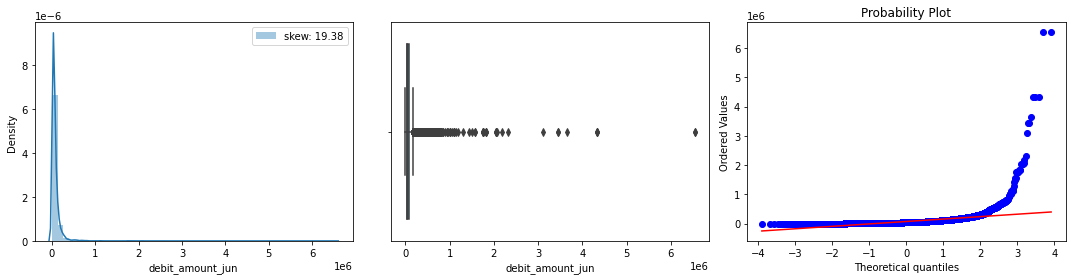

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


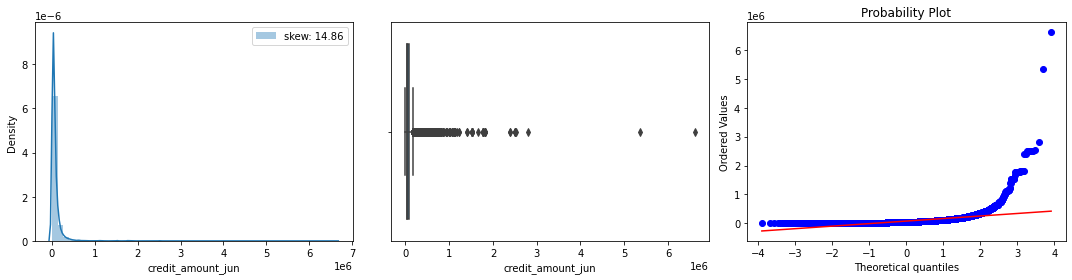

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


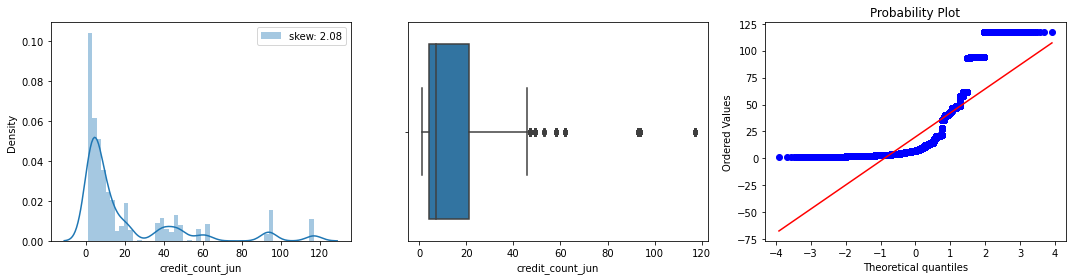

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


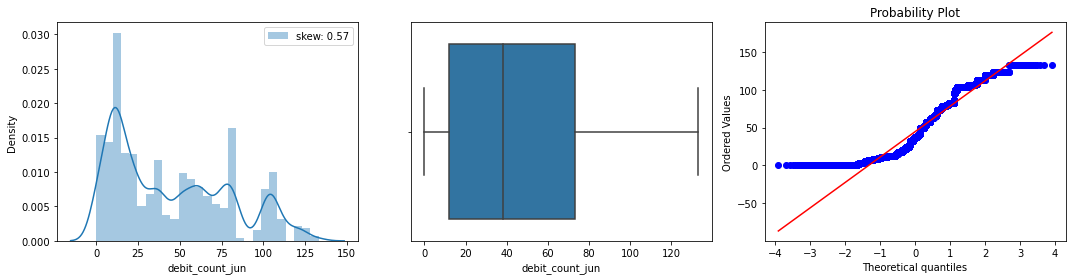

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


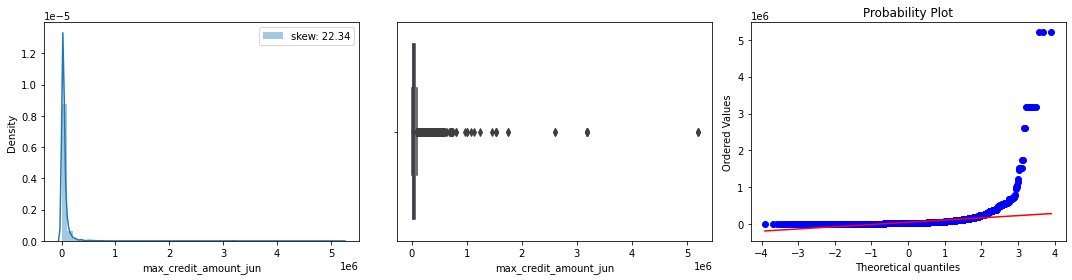

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


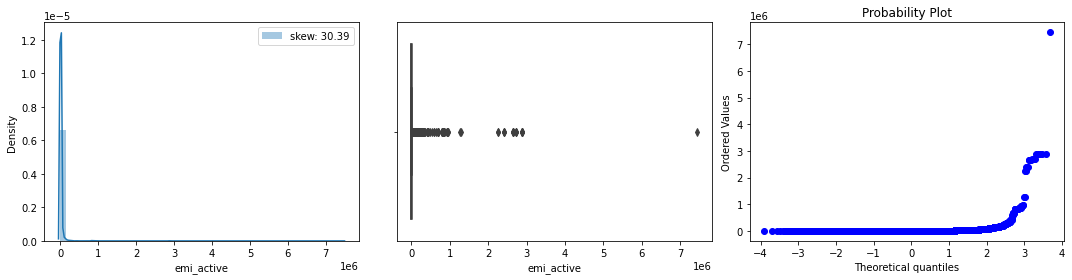

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


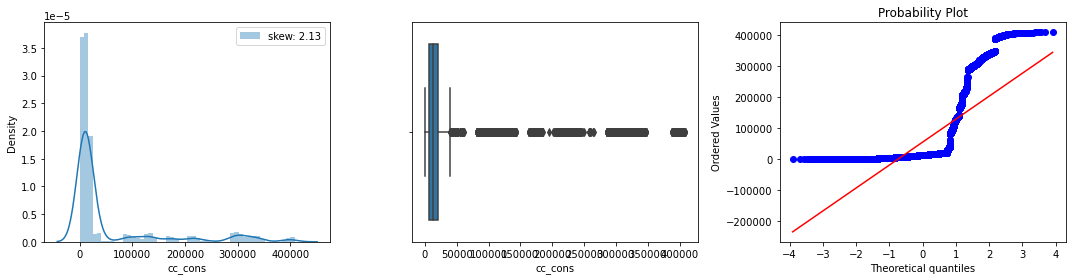

In [41]:
# checking for outliers

import scipy.stats as stats

num_var = [feature for feature in hist_data.columns if hist_data[feature].dtype!='O' and feature not in ['ID']]

for col in num_var:
    df=hist_data.copy()
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [42]:
# checking weather encoding is required

cat_var = [feature for feature in hist_data.columns if hist_data[feature].dtype=='O']

print('categorical variable count {}'.format(len(cat_var)))

# display of data with categorical features
hist_data[cat_var].head()

categorical variable count 4


,account_type,gender,Income,loan_enq
111,current,M,MEDIUM,Y
112,current,M,HIGH,Y
113,current,M,MEDIUM,Y
114,current,F,MEDIUM,Y
115,current,M,MEDIUM,NaN


In [43]:
# encoding is required for account_type, gender, loan_enq and Income

# account_type, gender and loan_enq have nominal categories and it requires nominal encoding.
# Income have ordinal category and it requires ordinal encoding.

In [44]:
for feature in cat_var:
    print('The feature is {} and the number of categories are {}'.format(feature,hist_data[feature].nunique()))

The feature is account_type and the number of categories are 2
The feature is gender and the number of categories are 2
The feature is Income and the number of categories are 3
The feature is loan_enq and the number of categories are 1


In [45]:
# loan_enq have only 1 distinct category, so it doesnt add any value to the model, hence it can be dropped 

In [46]:
# checking for co-efficient of variance (CV) of features in the data
# NOTE : features having less variance (ie. cv<0.05)will not be helpful to do analysis, so they can be dropped

hist_data[num_var].apply(lambda x : x.std()/x.mean())

age                             0.640979
Emp_Tenure_Years                1.337766
Tenure_with_Bank                0.520106
region_code                     0.367742
NetBanking_Flag                 0.624352
Avg_days_between_transaction    0.497066
cc_cons_apr                     1.402650
dc_cons_apr                     1.807961
cc_cons_may                     1.656409
dc_cons_may                     2.464729
cc_cons_jun                     1.524344
dc_cons_jun                     1.867121
cc_count_apr                    2.348435
cc_count_may                    1.479269
cc_count_jun                    1.140601
dc_count_apr                    1.127464
dc_count_may                    1.222284
dc_count_jun                    0.965835
card_lim                        0.647748
personal_loan_active            0.000000
vehicle_loan_active             0.000000
personal_loan_closed            0.000000
vehicle_loan_closed             0.000000
investment_1                    4.985058
investment_2    

In [47]:
# checking correlation between independent variables

corr_matrix = hist_data.corr()

corr_matrix

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,-0.001936,-0.007564,0.000827,-0.003070,-0.001593,-0.002351,0.006757,-0.005333,0.016962,0.008824,0.008500,0.009802,0.004193,0.002149,-0.009104,0.003560,0.001711,0.003303,0.003735,NaN,NaN,NaN,NaN,0.000675,-0.008119,-0.004864,-0.016825,0.003135,-0.001451,0.003152,0.001676,0.004507,0.001152,-0.011156,-0.012113,0.005933,-0.005219,0.004099,0.001776,-0.003272,-0.011713,0.002199,0.002639,0.004666
age,-0.001936,1.000000,0.810114,0.002274,0.009568,0.018551,0.000125,0.007961,0.017420,-0.001586,-0.004452,-0.013386,0.008623,0.004957,0.000137,0.003178,0.009552,-0.010466,0.014898,0.000493,NaN,NaN,NaN,NaN,0.002375,0.012331,0.021649,0.005502,0.009294,0.011501,-0.000002,-0.002837,0.001019,0.006916,-0.006295,0.004107,0.018281,0.007327,-0.001059,-0.009463,-0.007759,0.000215,-0.001743,0.004290,-0.006965
Emp_Tenure_Years,-0.007564,0.810114,1.000000,-0.004545,0.011645,0.012030,0.007055,0.005367,0.015731,-0.004784,-0.001140,-0.015891,0.015979,0.009155,-0.003441,0.008398,0.004991,-0.005504,0.009884,-0.000168,NaN,NaN,NaN,NaN,0.002910,-0.000445,0.013640,0.002694,0.001315,0.000240,0.003296,-0.001060,-0.002404,-0.000096,-0.005613,-0.000899,0.023339,-0.002833,0.004395,-0.007823,-0.010291,-0.005712,-0.003383,-0.000594,-0.008416
Tenure_with_Bank,0.000827,0.002274,-0.004545,1.000000,-0.003683,-0.005822,0.009385,-0.006918,-0.007355,0.013001,0.000488,-0.012819,-0.005133,0.012032,-0.010340,-0.004311,0.003785,0.003865,0.002697,0.007027,NaN,NaN,NaN,NaN,-0.007515,0.003668,0.008776,-0.018092,-0.014071,0.015095,-0.002690,0.002581,0.005170,-0.011775,-0.004742,-0.000122,0.004599,0.011888,-0.000062,0.001958,-0.009559,-0.000846,-0.006441,0.002457,0.011538
region_code,-0.003070,0.009568,0.011645,-0.003683,1.000000,0.006838,-0.017239,0.006899,-0.010570,-0.010820,0.006506,-0.008059,0.011785,-0.003762,0.010449,-0.006900,-0.017187,-0.004181,-0.019703,-0.000861,NaN,NaN,NaN,NaN,-0.000214,0.003753,0.003599,-0.002149,-0.002064,0.001415,0.001903,-0.007563,0.007511,-0.010005,0.021692,-0.006829,0.002518,-0.003501,0.023946,0.000790,0.002281,0.010512,0.000875,0.003976,-0.018824
NetBanking_Flag,-0.001593,0.018551,0.012030,-0.005822,0.006838,1.000000,0.009017,0.003291,-0.006536,-0.002122,0.006908,-0.002462,0.000837,0.012866,0.004971,-0.001517,0.010965,-0.009973,0.000338,-0.006669,NaN,NaN,NaN,NaN,0.000407,0.010292,-0.012651,0.002046,-0.015423,-0.000203,-0.005256,-0.008364,0.006623,0.001617,-0.001617,0.009354,-0.013535,0.003559,-0.016023,0.002795,0.011630,-0.000539,0.002451,0.004642,0.001640
Avg_days_between_transaction,-0.002351,0.000125,0.007055,0.009385,-0.017239,0.009017,1.000000,0.009393,0.009889,0.013300,0.003486,0.001734,-0.005179,-0.015964,0.007166,0.000588,0.003167,-0.014333,0.000430,0.007975,NaN,NaN,NaN,NaN,-0.002164,0.005251,0.003539,0.004683,0.002249,-0.000737,-0.002180,-0.017914,0.007955,-0.009191,0.001596,0.002698,-0.000094,0.002593,-0.005507,0.001218,-0.004596,0.000670,0.013174,0.004431,-0.005439
cc_cons_apr,0.006757,0.007961,0.005367,-0.006918,0.006899,0.003291,0.009393,1.000000,0.000455,0.004885,0.001654,0.006478,-0.004027,-0.003294,0.011572,0.008531,0.002130,-0.003387,0.010569,0.009590,NaN,NaN,NaN,NaN,0.009054,-0.001636,-0.000784,-0.000453,-0.001441,0.005399,0.001558,0.000341,-0.007739,-0.000492,0.000305,-0.003245,0.003222,-0.002136,0.001587,-0.008461,-0.007487,0.012826,-0.004225,0.001389,0.

In [48]:
# we can see that age and Emp_Tenure_Years are highly correlated with each other, hence any one can be dropped

### Data Preperation - 1

- 1. Renaming variable if required

In [49]:
# from Data analysis/Data audit we found that all the columns names are appropriate, hence Renaming the variables not required 

hist_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

- 2. Type casting of variables

In [50]:
hist_data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,1,1,1.0,1,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,21,31,127500,1,1,1.0,1,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
113,7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,1,1,1.0,1,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
114,1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,1,1,1.0,1,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
115,16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,1,1,1.0,1,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44,96408.0


In [51]:
# from the data analysis we found that there are not mismatch in the data type
# hence type casting of variables in not required

hist_data.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64


- 3. Removing duplicates

In [52]:
# from data analysis we found that there are no duplicates present in the data

hist_data.duplicated().sum()

0

#### as per data analysis from data analysis we found out that ID, personal_loan_active, vehicle_loan_active, personal_loan_closed, vehicle_loan_closed, loan_enq. 

In [53]:
hist_data.drop(columns=['ID','age','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'], axis=1, inplace=True)

C:\Users\PANDA\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
hist_data.head()

,account_type,gender,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,current,M,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,20014.0
112,current,M,HIGH,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,21,31,127500,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,10173.0
113,current,M,MEDIUM,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,25375.27,16095.0
114,current,F,MEDIUM,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,3544.33,7707.0
115,current,M,MEDIUM,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.0,8,32,32044.0,12780.44,96408.0


- 4. handling missing data

In [55]:
def missing_value_treat(x):
    if ((x.dtype=='float') | (x.dtype=='int')):
        x[x==999] = np.nan
        x = x.fillna(x.median())
    else:
        x[x=='unknown'] = np.nan
        x = x.fillna(x.mode()[0])
        
    return x

In [56]:
hist_data = hist_data.apply(missing_value_treat)

In [57]:
hist_data.isnull().sum()

account_type                    0
gender                          0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amo

- 5. Handling Outliers

In [58]:
hist_data.describe()

,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,15.184007,5.510000,598.415467,0.719533,11.049600,17958.010992,8171.098287,1.633705e+04,7704.545870,12129.765102,7098.326521,41.487400,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,6.194140e+05,2.333642e+05,44436.868993,3523.049025,6.823421e+04,8.079761e+04,36.401933,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576060e+04,55157.729867
std,20.312648,2.865783,220.062345,0.449242,5.492196,25187.637179,14773.029481,2.706085e+04,18987.034487,18488.442426,13251.349106,97.432486,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,3.087815e+06,4.073237e+05,88112.765594,7373.355434,1.126786e+05,1.989060e+05,30.700078,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179152e+05,97670.972252
min,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5.100000,3.000000,424.000000,0.000000,6.000000,4411.775000,1634.000000,3.638000e+03,1643.500000,3004.500000,1359.630000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549770e+03,6768.000000
50%,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,8.695030e+03,3821.000000,6656.025000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03,13364.000000
75%,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.536829e+04,8.593500e+04,52.000000,19.000000,5.255900e+04,7.440055e+04,9.456936e+04,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,203.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,82.000000,71.000000,98.000000,1000000.00000

In [59]:
def outlier_treat(x):
    if ((x.dtype=='int') | (x.dtype=='float')):
        x = x.clip(lower=x.quantile(0.03), upper=x.quantile(0.97))
    else:
        x = x
    return x

In [60]:
hist_data = hist_data.apply(outlier_treat)

In [61]:
hist_data.describe()

,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,13.453327,5.510000,599.090467,0.719533,11.049600,16573.840692,7193.648430,14813.657268,6624.018064,11021.438642,6109.738749,41.487400,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,3.517529e+05,2.106013e+05,40280.737327,3419.587692,61240.827835,70549.724959,35.744667,11.291400,45540.683477,59331.898903,73184.220283,11.923133,40.996867,47074.500714,66809.038433,68751.408020,19.946400,44.647867,44858.158463,8614.813720,54067.748300
std,11.289508,2.865783,217.937799,0.449242,5.492196,17753.190084,8456.961481,16657.772685,7793.138921,11960.492692,7382.589294,97.432486,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,9.281541e+05,2.743235e+05,66603.267113,6724.068706,59915.745752,70966.988456,28.645324,12.670785,40989.640826,59644.723182,71331.768211,16.843563,40.537354,44724.172450,62552.522349,68319.367746,27.200165,35.089082,43628.725709,13194.018061,94129.136761
min,1.300000,1.000000,245.000000,0.000000,2.000000,993.970000,276.250000,790.485000,296.000000,588.814000,277.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.110000e+02,9.335000e+01,539.000000,-6301.000000,2193.171000,3604.830000,2.000000,0.000000,6128.000000,3598.330000,2746.130000,0.000000,0.000000,2381.040000,4372.980000,898.000000,1.000000,0.000000,566.820000,107.980000,750.880000
25%,5.100000,3.000000,424.000000,0.000000,6.000000,4411.775000,1634.000000,3638.000000,1643.500000,3004.500000,1359.630000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,23230.430000,26846.000000,11.000000,2.000000,20683.000000,21003.330000,25410.270000,2.000000,11.000000,20083.000000,25732.592500,24920.080000,4.000000,12.000000,19038.000000,1549.770000,6768.000000
50%,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,8695.030000,3821.000000,6656.025000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,4.503600e+04,1.110000e+05,13873.000000,2351.000000,41875.600000,47097.000000,32.000000,5.000000,31915.000000,38235.680000,48140.000000,4.000000,23.000000,31403.000000,45803.650000,45900.000000,7.000000,38.000000,30425.500000,3955.280000,13364.000000
75%,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,18951.300000,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,75368.295000,85935.000000,52.000000,19.000000,52559.000000,74400.550000,94569.360000,11.000000,69.000000,55986.000000,84619.095000,85592.327500,21.000000,73.000000,53211.000000,9376.390000,20105.750000
max,46.000000,10.000000,958.000000,1.000000,20.000000,75460.000000,36242.820000,72254.620000,34817.200000,51746.642300,31854.920000,531.000000,601.000000,653.000000,82.000000,71.000000,98.000000,1000000.000000,4.614670e+06,1.194406e+

- 6. Encoding variables

In [62]:
# performing nomial encoding for account_type & gender variable

hist_data = pd.get_dummies(hist_data, columns=['account_type','gender'], drop_first=True)

In [63]:
# perfoming ordinal encoding for Income variable

hist_data['Income'] = np.where(hist_data.Income=='LOW',1,np.where(hist_data.Income=='MEDIUM',2,3))

In [64]:
hist_data.head()

,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
111,2,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,20014.0,0,1
112,3,15.0,6,245.0,0,14.0,18941.62,966.00,20672.00,296.00,4217.00,885.00,1.0,7,13,3,21,31,127500,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,10173.0,0,1
113,2,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,25375.27,16095.0,0,1
114,2,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,3544.33,7707.0,0,0
115,2,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.0,8,32,32044.0,12780.44,96408.0,0,1


### Data Preparation Level 2 : Assumptions
- Y variable should follow normal distribution
- Decent corr b.w X and Y
- No Major corr b.w X and X variables

In [65]:
# Checking if the Y variabble is normal

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

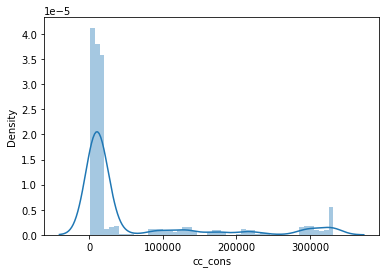

In [66]:
sns.distplot(hist_data.cc_cons)

In [67]:
print ("skewness:",hist_data.cc_cons.skew())
print ( "kurtosis:",hist_data.cc_cons.kurtosis())

skewness: 2.034655179699703
kurtosis: 2.701184796406468


C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

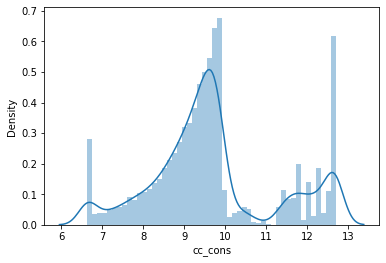

In [68]:
# Y is not having normal distribution, so applying transformation on y
sns.distplot(np.log(hist_data.cc_cons))

In [69]:
print ("skewness:",np.log(hist_data.cc_cons).skew())
print ( "kurtosis:",np.log(hist_data.cc_cons).kurtosis())

skewness: 0.4309931094874425
kurtosis: -0.19984123972236878


In [70]:
hist_data['ln_cc_cons'] = np.log(hist_data.cc_cons)

In [71]:
del hist_data['cc_cons']

In [72]:
hist_data.head()

,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,ln_cc_cons
111,2,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,0,1,9.904187
112,3,15.0,6,245.0,0,14.0,18941.62,966.00,20672.00,296.00,4217.00,885.00,1.0,7,13,3,21,31,127500,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,0,1,9.227492
113,2,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.0,7,1,27036.0,25375.27,0,1,9.686264
114,2,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.0,21,83,43037.0,3544.33,0,0,8.949884
115,2,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.0,8,32,32044.0,12780.44,0,1,11.476344


In [73]:
# checking correlation betweem X & Y

In [74]:
hist_data.corrwith(hist_data.ln_cc_cons)

Income                          0.000231
Emp_Tenure_Years               -0.013550
Tenure_with_Bank                0.006089
region_code                    -0.009624
NetBanking_Flag                 0.001354
Avg_days_between_transaction   -0.009786
cc_cons_apr                     0.006270
dc_cons_apr                     0.007102
cc_cons_may                     0.020379
dc_cons_may                    -0.008678
cc_cons_jun                     0.005402
dc_cons_jun                    -0.011145
cc_count_apr                   -0.014469
cc_count_may                    0.022592
cc_count_jun                   -0.001809
dc_count_apr                    0.002768
dc_count_may                    0.004666
dc_count_jun                   -0.003568
card_lim                       -0.006459
investment_1                    0.005104
investment_2                    0.004222
investment_3                   -0.014045
investment_4                    0.001225
debit_amount_apr                0.000359
credit_amount_ap

In [75]:
# checking correlation between X & X

In [76]:
corr_matrix = hist_data.corr()

<AxesSubplot:>

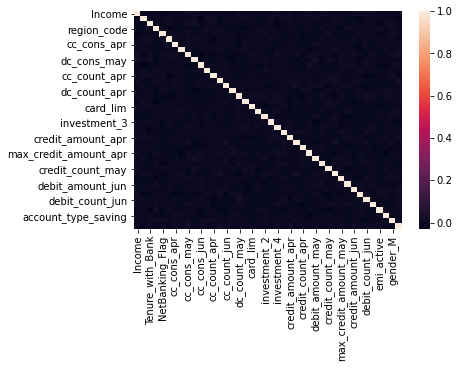

In [77]:
sns.heatmap(corr_matrix)

### Data Preparation Level III (Feature Reduction)

In [78]:
hist_data.shape

(15000, 42)

In [79]:
features = hist_data[hist_data.columns.difference(['ln_cc_cons'])]
target = hist_data.ln_cc_cons

- Feature selection based on importance

#### F1-Regression

In [80]:
from sklearn.feature_selection import f_regression

In [81]:
F_values, P_values = f_regression(features, target)

In [82]:
F_values

array([1.43641137e+00, 2.75413350e+00, 8.02537483e-04, 2.75127264e-02,
       5.56084573e-01, 2.57705880e-01, 6.25659501e-01, 5.89678785e-01,
       4.37706898e-01, 6.23121836e+00, 3.14033666e+00, 4.90987802e-02,
       7.65903226e+00, 4.09366906e+00, 1.37160824e+00, 1.41363162e+00,
       6.43589743e-02, 3.65643613e-01, 2.66618113e-01, 7.56525876e-01,
       1.86317998e+00, 1.12950910e+00, 1.14895655e-01, 1.90975784e-01,
       3.26523917e-01, 1.93387933e-03, 3.86746658e-01, 1.51814407e-01,
       2.05568944e+00, 3.69563900e-01, 1.72336891e-01, 8.90122702e-01,
       4.91375650e-02, 3.90726777e-01, 2.67400424e-01, 2.95896515e+00,
       2.24904073e-02, 1.47379191e-01, 2.40108905e+00, 1.37937860e-01,
       1.38921277e+00])

In [83]:
P_values

array([0.23073988, 0.09702427, 0.97740005, 0.8682618 , 0.45585383,
       0.61170811, 0.42896443, 0.44255545, 0.50824148, 0.01256238,
       0.07639834, 0.82464197, 0.0056558 , 0.04306181, 0.24155436,
       0.23447328, 0.79973799, 0.54539765, 0.60561706, 0.38443185,
       0.17227871, 0.28789718, 0.73464264, 0.66211201, 0.5677217 ,
       0.9649242 , 0.53402393, 0.69681297, 0.15165945, 0.54325128,
       0.67804917, 0.34545926, 0.82457385, 0.53192713, 0.60508857,
       0.08542321, 0.88079186, 0.70105803, 0.12127191, 0.71034497,
       0.23855679])

In [84]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_values), pd.Series(P_values)], axis=1)

In [85]:
f_reg_results.columns = ['features','F_value','P_value']

In [86]:
f_reg_results_new = f_reg_results.sort_values(by='P_value', ascending=True).head(12)

In [87]:
f_reg_results_new

,features,F_value,P_value
12,cc_count_may,7.659032,0.005656
9,cc_cons_may,6.231218,0.012562
13,credit_amount_apr,4.093669,0.043062
10,cc_count_apr,3.140337,0.076398
35,investment_3,2.958965,0.085423
1,Emp_Tenure_Years,2.754134,0.097024
38,max_credit_amount_jun,2.401089,0.121272
28,debit_count_apr,2.055689,0.151659
20,dc_cons_jun,1.863180,0.172279
0,Avg_days_between_transaction,1.436411,0.230740


In [88]:
f_reg_imp_vars = list(f_reg_results_new.features)

In [89]:
# important feaatures selected by f_regression

f_reg_imp_vars

['cc_count_may',
 'cc_cons_may',
 'credit_amount_apr',
 'cc_count_apr',
 'investment_3',
 'Emp_Tenure_Years',
 'max_credit_amount_jun',
 'debit_count_apr',
 'dc_cons_jun',
 'Avg_days_between_transaction',
 'credit_amount_may',
 'region_code']

#### RFE

In [90]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [91]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=10)
rfe = rfe.fit(features, target )
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False])

In [92]:
RFE_imp_vars = features.columns[rfe.support_]

In [93]:
# important features selected by RFE

list(RFE_imp_vars)

['cc_cons_apr',
 'cc_cons_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_amount_may',
 'dc_cons_apr',
 'dc_cons_jun',
 'debit_amount_may',
 'emi_active',
 'max_credit_amount_apr']

#### K Best

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif

In [95]:
selector=SelectKBest(f_classif,k=10).fit(features,target)

In [96]:
K_Best_10=features.columns[selector.get_support()]

In [97]:
# important features selected byy KBest

list(K_Best_10)

['card_lim',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_count_jun',
 'dc_cons_apr']

#### Corr between X and Y

In [98]:
col_names = pd.Series(list(features.corrwith(target).index),name="Column_Names")

In [99]:
R_values = pd.Series(list(features.corrwith(target)),name="R_Values")

In [100]:
corr = pd.concat([col_names,R_values],axis=1)

In [101]:
corr["abs_R_values"]=np.abs(corr.R_Values)

In [102]:
corr_12 = corr.sort_values(by=["abs_R_values"],ascending=False).head(12)

In [103]:
# important features selected by correlation

list(corr_12.Column_Names)

['cc_count_may',
 'cc_cons_may',
 'credit_amount_apr',
 'cc_count_apr',
 'investment_3',
 'Emp_Tenure_Years',
 'max_credit_amount_jun',
 'debit_count_apr',
 'dc_cons_jun',
 'Avg_days_between_transaction',
 'credit_amount_may',
 'region_code']

In [104]:
final_features = list(set(list(f_reg_results_new.features)+list(RFE_imp_vars)+list(K_Best_10)+list(corr_12.Column_Names)))

In [105]:
final_features

['dc_cons_jun',
 'investment_3',
 'max_credit_amount_apr',
 'cc_count_apr',
 'credit_amount_apr',
 'cc_cons_may',
 'credit_count_jun',
 'dc_cons_apr',
 'cc_cons_jun',
 'Avg_days_between_transaction',
 'credit_amount_jun',
 'card_lim',
 'debit_amount_may',
 'region_code',
 'Emp_Tenure_Years',
 'credit_amount_may',
 'debit_count_apr',
 'max_credit_amount_jun',
 'emi_active',
 'cc_count_may',
 'cc_count_jun',
 'cc_cons_apr']

### Variance Inflation Factor (VIF)

In [106]:
features_new = hist_data[hist_data[final_features].columns.difference(['region_code'])]

In [107]:
#multicolinieity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif_values = pd.Series([variance_inflation_factor(features_new.values, exog_idx= i) for i in range(0, len(features_new.columns))])

In [109]:
vif_values1 = pd.concat([pd.Series(features_new.columns), vif_values], axis=1)

In [110]:
vif_values1.columns = ['feature', 'vif']

In [111]:
vif_values1.sort_values(by='vif', ascending=False)

,feature,vif
0,Avg_days_between_transaction,4.225651
2,card_lim,3.029663
16,debit_count_apr,2.389576
1,Emp_Tenure_Years,2.285576
19,max_credit_amount_apr,2.122802
11,credit_amount_may,1.962186
20,max_credit_amount_jun,1.950575
10,credit_amount_jun,1.925640
9,credit_amount_apr,1.904739
15,debit_amount_may,1.902005


In [112]:
data_selected = pd.concat([features_new, target], axis=1)

#### Data Preparation Level 4 : split data into train and test


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
train, test = train_test_split(data_selected, test_size=0.3, random_state=123)

In [115]:
train.shape

(10500, 22)

In [116]:
test.shape

(4500, 22)

### Model Building

In [117]:
y = 'ln_cc_cons'

In [118]:
y

'ln_cc_cons'

In [119]:
s = str()

In [120]:
for i in data_selected.columns.tolist():
    s = s + '+' + i

In [121]:
equation=s[1:]

In [122]:
equation

'Avg_days_between_transaction+Emp_Tenure_Years+card_lim+cc_cons_apr+cc_cons_jun+cc_cons_may+cc_count_apr+cc_count_jun+cc_count_may+credit_amount_apr+credit_amount_jun+credit_amount_may+credit_count_jun+dc_cons_apr+dc_cons_jun+debit_amount_may+debit_count_apr+emi_active+investment_3+max_credit_amount_apr+max_credit_amount_jun+ln_cc_cons'

In [123]:
equation= y +"~" +equation

In [124]:
equation

'ln_cc_cons~Avg_days_between_transaction+Emp_Tenure_Years+card_lim+cc_cons_apr+cc_cons_jun+cc_cons_may+cc_count_apr+cc_count_jun+cc_count_may+credit_amount_apr+credit_amount_jun+credit_amount_may+credit_count_jun+dc_cons_apr+dc_cons_jun+debit_amount_may+debit_count_apr+emi_active+investment_3+max_credit_amount_apr+max_credit_amount_jun+ln_cc_cons'

In [125]:
import statsmodels.formula.api as smf

In [126]:
model = smf.ols('ln_cc_cons~cc_count_may+credit_amount_apr+emi_active', data=train).fit()

In [127]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.767
Date:                Sat, 18 Sep 2021   Prob (F-statistic):            0.00253
Time:                        17:33:02   Log-Likelihood:                -19391.
No. Observations:               10500   AIC:                         3.879e+04
Df Residuals:                   10496   BIC:                         3.882e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5922      0.02

In [128]:
# predicting values for train data

pred_ln_cc_cons = model.predict(train)
pred_train = np.exp(pred_ln_cc_cons)
actual_train = np.exp(train.ln_cc_cons)

In [129]:
# predicting values for test data

pred_ln_cc_cons = model.predict(test)
pred_test = np.exp(pred_ln_cc_cons)
actual_test = np.exp(test.ln_cc_cons)

In [130]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(actual_train -pred_train)/actual_train)
print(MAPE_train)
MAPE_test = np.mean(np.abs(actual_test- pred_test)/actual_test)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(actual_train,pred_train))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(actual_test,pred_test))
print(RMSE_test)

#Root Mean Squared percentage error
print("\nRMSPE values for training and testing data :")
RMSPE_train = np.sqrt(np.mean(((actual_train-pred_train)/actual_train)**2))
print(RMSPE_train)
RMSPE_test = np.sqrt(np.mean(((actual_test-pred_test)/actual_test)**2))
print(RMSPE_test)


MAPE values for training and testing data :
2.0615848500881206
2.0108287292911835

RMSE values for training and testing data :
101564.78808187984
101629.4685689123

RMSPE values for training and testing data :
4.598947468658032
4.539766944388007


In [295]:
# creating a dataframe to store RMSPE values  for comparing purpose
df = pd.DataFrame(columns=['model_name','train_RMSPE', 'test_RMSPE'])

In [296]:
# appending values from linear Regression model
df = df.append({'model_name':'Linear Regressor', 'train_RMSPE': np.sqrt(np.mean(((actual_train-pred_train)/actual_train)**2)), 'test_RMSPE': np.sqrt(np.mean(((actual_test-pred_test)/actual_test)**2))}, ignore_index=True)

## Machine Learning 

In [131]:
x = data_selected[data_selected.columns.difference(['ln_cc_cons'])]
y = data_selected.ln_cc_cons

In [132]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=123)

In [133]:
train_x.shape

(10500, 21)

In [134]:
train_y.shape

(10500,)

In [135]:
test_x.shape

(4500, 21)

In [136]:
test_y.shape

(4500,)

In [137]:
# Importing Required Packages
from sklearn.linear_model import Lasso, Ridge

### Lasso Regression 

In [138]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, normalize=True)

In [232]:
# finding all metric results

def model_metric_results(model,train_x, train_y, test_x, test_y):
    print('MAPE')
    print('train_MAPE :', np.mean(np.abs((train_y-model.predict(train_x))/train_y)))
    print('test_MAPE :', np.mean(np.abs((test_y-model.predict(test_x))/test_y)))
    print('------------------------------------------------------------------------------------------------------------')
    print('RMSE')
    print('train_RMSE :', np.sqrt(np.mean((train_y-model.predict(train_x))**2)))
    print('test_RMSE :', np.sqrt(np.mean((test_y-model.predict(test_x))**2)))
    print('------------------------------------------------------------------------------------------------------------')
    print('RMSPE')
    print('train_RMSPE :', np.sqrt(np.mean(((train_y-model.predict(train_x))/train_y)**2)))
    print('test_RMSPE :', np.sqrt(np.mean(((test_y-model.predict(test_x))/test_y)**2)))

In [233]:
model_metric_results(Lasso_Reg, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11884660740813577
test_MAPE : 0.11780851564685296
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5334102315989377
test_RMSE : 1.5258056677935785
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16472422142405035
test_RMSPE : 0.16290007515568988


In [297]:
# appending values from linear Regression model
df = df.append({'model_name':'Lasso Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-Lasso_Reg.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-Lasso_Reg.predict(test_x))/test_y)**2))}, ignore_index=True)

### Ridge Regression

In [235]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, normalize=True)

In [236]:
model_metric_results(Ridge_Reg, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11896770183682649
test_MAPE : 0.1179228849118366
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.532930110223208
test_RMSE : 1.525668844335142
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16464474107976038
test_RMSPE : 0.1629118538270119


In [298]:
# appending values from linear Regression model
df = df.append({'model_name':'Ridge Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-Ridge_Reg.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-Ridge_Reg.predict(test_x))/test_y)**2))}, ignore_index=True)

### KNN Regression

In [142]:
# standardizing the data

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [143]:
z_x = StandardScaler()

In [144]:
z_x = z_x.fit(train_x)

In [145]:
# standardizing train_x

train_x_std = pd.DataFrame(z_x.transform(train_x),columns=train_x.columns)

train_x_std

,Avg_days_between_transaction,Emp_Tenure_Years,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_jun,dc_cons_apr,dc_cons_jun,debit_amount_may,debit_count_apr,emi_active,investment_3,max_credit_amount_apr,max_credit_amount_jun
0,1.442469,-0.846159,1.391074,-0.786021,-0.210230,-0.709408,-0.363379,-0.720795,-0.392123,-0.266304,-0.268909,2.154141,-0.513878,-0.091383,-0.744433,-0.476172,1.893090,-0.534177,0.147714,0.515310,-0.653293
1,-0.558482,1.635432,1.519798,-0.771526,0.723239,-0.514064,0.190824,-0.741439,-0.207643,-0.809539,-0.625709,0.561468,1.530038,-0.588038,-0.640099,-0.493315,0.354910,-0.174386,-0.401128,2.618055,-0.071572
2,0.351041,0.575678,-0.724474,-0.413290,-0.500811,-0.676683,-0.414694,0.166888,0.017833,-0.242174,-0.543434,0.396217,2.697990,-0.664879,-0.705336,-0.494418,0.949207,-0.641624,-0.419128,-0.503692,-0.789954
3,-1.104196,-0.572389,0.266140,-0.679404,-0.652376,-0.166262,0.016352,-0.204700,-0.146149,-0.939820,-0.702786,-0.184992,3.537455,-0.487779,-0.784242,0.376278,0.110200,3.676864,-0.430521,3.693555,-0.046382
4,1.624373,1.193867,-0.019291,-0.815541,-0.342511,-0.160625,-0.158119,0.146245,0.673763,-0.654046,-0.653228,0.993459,3.537455,-0.378398,-0.531389,-0.627695,-0.868642,-0.526478,-0.424200,-0.551725,-0.605002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,-0.922291,2.871811,-0.651717,0.044318,0.627830,-0.566368,-0.353116,-0.720795,1.944627,-0.081256,2.567203,0.397215,3.537455,-0.809341,-0.440888,0.798071,1.508545,-0.137012,-0.096493,-0.555416,0.340981
10496,-1.104196,-0.696027,-1.356900,-0.533005,-0.549479,-0.749491,0.149772,-0.452426,-0.658595,-0.425163,1.853467,-0.987521,-0.258388,-0.571437,0.681446,-0.415235,-0.693849,-0.481177,-0.551074,0.741178,-0.479559
10497,-1.104196,-0.554726,-0.248755,0.793863,-0.018314,-0.289753,-0.178645,0.971996,-0.125652,-0.117664,0.967076,2.743153,0.982560,-0.324507,2.761856,-0.504367,-0.868642,0.159507,-0.565011,-0.640581,-0.377539
10498,0.532946,-1.066941,0.540378,-0.604554,-0.872072,-0.769890,-0.353116,-0.741439,-0.084656,0.371343,-0.655237,0.288537,-0.623373,1.166786,1.486343,-0.932552,-0.903601,-0.279851,-0.541623,-0.968863,-0.194927


In [146]:
# standardizing test_x

test_x_std = pd.DataFrame(z_x.transform(test_x),columns=test_x.columns)

test_x_std

,Avg_days_between_transaction,Emp_Tenure_Years,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_jun,dc_cons_apr,dc_cons_jun,debit_amount_may,debit_count_apr,emi_active,investment_3,max_credit_amount_apr,max_credit_amount_jun
0,-1.104196,-0.784340,0.753052,0.986082,-0.771688,-0.202712,-0.404431,0.352683,-0.617599,-0.599849,-0.754042,3.265352,0.982560,1.114096,-0.414247,-0.184701,1.893090,0.280096,-0.220659,0.195197,-0.236313
1,0.169137,-0.484076,-1.435253,-0.877691,0.838642,-0.649725,0.149772,-0.596932,0.284305,-0.614534,0.091517,3.265352,-0.623373,-0.608826,3.467377,0.198207,0.215076,-0.490340,-0.251120,3.693555,-0.723425
2,-0.012768,1.494131,-1.452043,-0.678780,-0.511673,-0.247135,0.221613,-0.782726,0.653265,3.694613,-0.459208,0.692010,-0.623373,-0.724546,0.508518,-0.318304,-1.113353,-0.619211,-0.093844,-0.589349,2.800583
3,1.624373,-0.660702,0.294123,-0.481111,0.247069,-0.562786,-0.096541,-0.803370,-0.146149,-0.445247,-0.866570,-0.781356,0.033599,0.009815,-0.635243,-0.607558,-0.029635,-0.022201,-0.595157,-0.738246,0.870787
4,1.442469,-0.607714,-1.396077,-0.734714,-0.419724,-0.571923,-0.363379,0.621052,-0.494612,0.672311,-0.314892,1.680015,0.654074,1.146878,-0.657093,-0.263537,0.669538,-0.382649,-0.153127,-0.698481,-0.443289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.442469,-1.075772,-1.250563,2.443332,-0.343017,0.250422,-0.404431,1.446804,-0.474114,0.431141,-0.296067,-0.307377,-0.659872,-0.765925,-0.434614,0.896601,-0.868642,-0.140538,-0.096493,-0.740018,-0.486212
4496,0.532946,0.363727,-0.595750,-0.102941,-0.686626,2.201229,-0.260749,0.579764,-0.617599,0.597842,-0.942908,3.265352,-0.294887,1.522639,-0.550946,3.310194,-1.043435,-0.440973,0.147338,-0.808007,0.573674
4497,-0.376577,-0.607714,-0.327109,-0.499763,0.371616,-0.213518,0.118983,0.765559,-0.207643,0.382429,3.474050,-0.987521,-0.440881,-0.786526,-0.486781,-0.367584,0.354910,1.370347,0.147714,-0.331354,-0.392474
4498,-1.286100,-0.572389,-0.651717,-0.846755,0.913611,0.428362,-0.404431,-0.142769,0.468785,0.558989,-0.069691,-0.262857,-0.513878,0.735204,0.430001,-0.801500,-1.078394,-0.130197,-0.302457,-0.190838,-0.323329


In [147]:
# tuning parameters

from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10], 'weights':['distance','uniform']}

In [148]:
knn_model = GridSearchCV(KNeighborsRegressor(), grid, cv=5, scoring='r2', n_jobs=-1, verbose=True)

In [149]:
knn_model = knn_model.fit(train_x_std, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [150]:
knn_model.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [151]:
knn_model.best_estimator_

KNeighborsRegressor(n_neighbors=10)

In [152]:
knn_model_final = KNeighborsRegressor(n_neighbors=10, weights='uniform')

In [153]:
knn_model_final = knn_model_final.fit(train_x_std, train_y)

In [238]:
model_metric_results(knn_model_final, train_x_std, train_y, test_x_std, test_y)

MAPE
train_MAPE : 0.11711440191438485
test_MAPE : 0.12604568743803585
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.4574141230571702
test_RMSE : 1.5829452814510443
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.15587335232290792
test_RMSPE : 0.16849399230022416


In [299]:
# appending values from linear Regression model
df = df.append({'model_name':'KNN Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-knn_model_final.predict(train_x_std))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-knn_model_final.predict(test_x_std))/test_y)**2))}, ignore_index=True)

In [286]:
df

,model_name,train_RMSPE,test_RMSPE
0,Linear Regressor,4.598947,4.539767
1,Lasso Regressor,0.164724,0.162900
2,Ridge Regressor,0.164645,0.162912
3,KNN Regressor,0.155873,0.168494


### Decisoion Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor

In [157]:
# tuning parameters

grid = {'max_depth':[2,3,4,5,6,7,8,9,10], 'max_leaf_nodes':[5,10,15,20,25,30], 'min_samples_split':[25,50,100,150,200]}

In [158]:
dt_model = GridSearchCV(DecisionTreeRegressor(),grid, cv=10, scoring='r2', n_jobs=-1, verbose=True)

In [159]:
dt_model = dt_model.fit(train_x, train_y)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


In [160]:
dt_model.best_params_

{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 150}

In [161]:
dt_model.best_estimator_

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=5, min_samples_split=150)

In [162]:
dt_model_final = DecisionTreeRegressor(max_depth=2, max_leaf_nodes=30, min_samples_split=25)

In [163]:
dt_model_final = dt_model_final.fit(train_x, train_y)

In [239]:
model_metric_results(dt_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11884968948421976
test_MAPE : 0.1181714184327962
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.532753215859122
test_RMSE : 1.528602471266504
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16472306202017206
test_RMSPE : 0.16321546922876545


In [300]:
# appending values from linear Regression model
df = df.append({'model_name':'DecisionTree Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-dt_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-dt_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

## Ensemble Models

### Homogeneous Ensemble models

#### Bagging

In [166]:
from sklearn.ensemble import BaggingRegressor

In [167]:
#  tuning parameter 

grid = {'n_estimators':[10,20,30,40,50,60,70,80,90]}

In [168]:
bg_model = GridSearchCV(BaggingRegressor(), grid, cv=5, scoring='r2', n_jobs=-1, verbose=True)

In [169]:
bg_model = bg_model.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [170]:
bg_model.best_params_

{'n_estimators': 90}

In [171]:
bg_model.best_estimator_

BaggingRegressor(n_estimators=90)

In [240]:
bg_model_final = BaggingRegressor(n_estimators=90)

In [241]:
bg_model_final = bg_model_final.fit(train_x, train_y)

In [242]:
model_metric_results(bg_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.045869178585478454
test_MAPE : 0.12073951321522187
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 0.5810460626619134
test_RMSE : 1.5374329859528648
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.06273027958597804
test_RMSPE : 0.1652897531745632


In [301]:
# appending values from linear Regression model
df = df.append({'model_name':'Bagging Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-bg_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-bg_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

#### RandomForest

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
# tuning parameters

grid = {'n_estimators':[50,100,150,200,250], 'max_depth':[2,3,4,5,6,7,8,9,10], 'max_features':[2,3,4,5,6,7,8,9,10]}

In [178]:
rf_model = GridSearchCV(RandomForestRegressor(), grid, cv=10, scoring='r2', verbose=True, n_jobs=-1)

In [179]:
rf_model = rf_model.fit(train_x, train_y)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


In [180]:
rf_model.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': 100}

In [181]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=2, max_features=2)

In [243]:
rf_model_final = RandomForestRegressor(n_estimators=100, max_depth=2, max_features=2)

In [244]:
rf_model_final = rf_model_final.fit(train_x, train_y)

In [245]:
model_metric_results(rf_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11867876594562798
test_MAPE : 0.11767445897031088
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5325297945158662
test_RMSE : 1.5253041579098388
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16466896382775395
test_RMSPE : 0.16280945292142956


In [302]:
# appending values from linear Regression model
df = df.append({'model_name':'RandomForest Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-rf_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-rf_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

### Boosting

#### Ada Boost

In [186]:
from sklearn.ensemble import AdaBoostRegressor

In [187]:
# tuning parameters

grid = {'n_estimators':[100,200,400,600,800], 'learning_rate':[10**x for x in range(-3,3)]}

In [188]:
ad_model = GridSearchCV(AdaBoostRegressor(), grid, cv=5, scoring='r2', verbose=True, n_jobs=-1)

In [189]:
ad_model = ad_model.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [190]:
ad_model.best_params_

{'learning_rate': 0.001, 'n_estimators': 200}

In [191]:
ad_model.best_estimator_

AdaBoostRegressor(learning_rate=0.001, n_estimators=200)

In [246]:
ad_model_final = AdaBoostRegressor(n_estimators=200, learning_rate=0.001)

In [247]:
ad_model_final = ad_model_final.fit(train_x, train_y)

In [248]:
model_metric_results(ad_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11880001506245862
test_MAPE : 0.11787430718107038
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.531029386993772
test_RMSE : 1.5250151943393884
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16474726726913513
test_RMSPE : 0.1630366366983182


In [304]:
# appending values from linear Regression model
df = df.append({'model_name':'AdaBoost Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-ad_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-ad_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

#### Gradient Boost

In [196]:
from sklearn.ensemble import GradientBoostingRegressor

In [197]:
# tuning parameters

grid = {'n_estimators':[60,70,80,100], 'learning_rate':[10**x for x in range(-3,3)], 'max_features':[2,3,4,5]}

In [198]:
gd_model = GridSearchCV(GradientBoostingRegressor(), grid, cv=5, scoring='r2', n_jobs=-1, verbose=True)

In [199]:
gd_model = gd_model.fit(train_x, train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\PANDA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-6.30698476e-004 -6.31900012e-004 -6.36680116e-004 -6.18195023e-004
 -6.28118913e-004 -6.17780819e-004 -6.57208237e-004 -6.54966497e-004
 -6.07162096e-004 -6.48730439e-004 -6.60217629e-004 -6.65596995e-004
 -6.47102329e-004 -6.73458378e-004 -6.61403861e-004 -6.97220541e-004
 -8.35494102e-004 -9.29835036e-004 -1.10005803e-003 -1.07242586e-003
 -9.91382929e-004 -1.23032107e-003 -1.22405099e-003 -1.28158274e-003
 -1.06579297e-003 -1.20276340e-003 -1.43628560e-003 -1.66858068e-003
 -1.35134832e-003 -1.27482110e-003 -1.57758829e-003 -1.64165287e-003
 -6.37935088e-003 -7.85176319e-003 -7.08697333e-003 -1.02044601e-002
 -8.08075579e-003 -1.04102290e-002 -1.02579397e-002 -1.05578828e-002
 -8.18356489e-003 -8.35231695e-003 -9.30614992e-003 -1.12659596e-002
 -9.52315028e-003 -9.69976538e-003 -9.89298022e-003 -1.38382831e-002
 -1.55496979e-001 -1.94592907

In [200]:
gd_model.best_params_

{'learning_rate': 0.001, 'max_features': 4, 'n_estimators': 60}

In [201]:
gd_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.001, max_features=4, n_estimators=60)

In [249]:
gd_model_final = GradientBoostingRegressor(n_estimators=60, learning_rate=0.001, max_features=4)

In [250]:
gd_model_final = gd_model_final.fit(train_x, train_y)

In [251]:
model_metric_results(gd_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11883164751716753
test_MAPE : 0.11773275343575877
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5345820405459294
test_RMSE : 1.525716918635148
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.1648854215392451
test_RMSPE : 0.1628468657732193


In [306]:
# appending values from linear Regression model
df = df.append({'model_name':'GradientBoost Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-gd_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-gd_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

#### XGBoost

In [206]:
# !pip install xgboost ------> we have to install xgboost if not already install on machine

from xgboost import XGBRegressor

In [207]:
# tuning parameters

s_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[60,70,80,100,200,300], 'max_depth':[2,3,4,5,6]}

In [208]:
xgb_model = GridSearchCV(XGBRegressor(), s_grid, cv=10, scoring='r2', n_jobs=-1, verbose=True)

In [209]:
xgb_model = xgb_model.fit(train_x, train_y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [210]:
xgb_model.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [211]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
xgb_model_final = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=2)

In [213]:
xgb_model_final = xgb_model_final.fit(train_x, train_y)

In [252]:
model_metric_results(xgb_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11662633421118594
test_MAPE : 0.11607136049323309
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5248545514356524
test_RMSE : 1.5258092147786682
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16203070874646924
test_RMSPE : 0.1611042247245405


In [308]:
# appending values from linear Regression model
df = df.append({'model_name':'XGBoost Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-xgb_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-xgb_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

### Heterogeneous Ensemble model

In [216]:
from sklearn.ensemble import VotingRegressor

In [217]:
voting_reg = VotingRegressor(estimators=[('Lasso',Lasso_Reg), ('Redge',Ridge_Reg), ('DT',dt_model_final),('RF',rf_model_final), ('ADB',ad_model_final),('GDB',gd_model_final),('XGB',xgb_model_final)])

In [218]:
voting_reg = voting_reg.fit(train_x, train_y)

In [253]:
model_metric_results(voting_reg, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.1183648780529405
test_MAPE : 0.11748058222058833
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5305635552628594
test_RMSE : 1.5252243954408824
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.1642445797470214
test_RMSPE : 0.16263017966157228


In [310]:
# appending values from linear Regression model
df = df.append({'model_name':'Voting Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-voting_reg.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-voting_reg.predict(test_x))/test_y)**2))}, ignore_index=True)

### Support Vector Machine

In [221]:
from sklearn.svm import LinearSVR, SVR

In [222]:
#tuning parameters

grid = {'C': [1,5,10], 'gamma':[0.0005, 0.001, 0.005]}

In [223]:
svr_model = GridSearchCV(SVR(), grid, cv=3, scoring='r2', n_jobs=-1, verbose=True)

In [224]:
svr_model = svr_model.fit(train_x, train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [225]:
svr_model.best_params_

{'C': 5, 'gamma': 0.0005}

In [226]:
svr_model.best_estimator_

SVR(C=5, gamma=0.0005)

In [228]:
svr_model_final = SVR(C=5, gamma=0.0005, kernel='rbf')

In [229]:
svr_model_final = svr_model_final.fit(train_x, train_y)

In [254]:
model_metric_results(svr_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.009963012943089085
test_MAPE : 0.11841271425569443
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 0.09575509460414429
test_RMSE : 1.5257502184085585
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.010319105990901396
test_RMSPE : 0.1635304981075101


In [312]:
# appending values from linear Regression model
df = df.append({'model_name':'Support Vector Regressor', 'train_RMSPE': np.sqrt(np.mean(((train_y-svr_model_final.predict(train_x))/train_y)**2)), 'test_RMSPE': np.sqrt(np.mean(((test_y-svr_model_final.predict(test_x))/test_y)**2))}, ignore_index=True)

In [313]:
# displaying RMSPE for train and test of all models
df

,model_name,train_RMSPE,test_RMSPE
0,Linear Regressor,4.598947,4.539767
1,Lasso Regressor,0.164724,0.162900
2,Ridge Regressor,0.164645,0.162912
3,KNN Regressor,0.155873,0.168494
4,DecisionTree Regressor,0.164723,0.163215
5,Bagging Regressor,0.062730,0.165290
6,RandomForest Regressor,0.164669,0.162809
7,AdaBoost Regressor,0.164747,0.163037
8,GradientBoost Regressor,0.164885,0.162847
9,XGBoost Regressor,0.162031,0.161104


In [316]:
# based on the above dataframe we can select the model with least RMSPE values
# which is 
df.sort_values(by= 'test_RMSPE', ascending=True).head(1)

,model_name,train_RMSPE,test_RMSPE
9,XGBoost Regressor,0.162031,0.161104


In [317]:
# so here we can see that XGBoost Regressor is the model with less RMSPE 
# hence selecting the XGBoost Regressor model for the prediction of new_data
# saving the model

import pickle

# now you can save it to a file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [318]:
# predicting the new_data

In [319]:
# displaying the new_data
new_data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [320]:
# checking variable names are appropriate
new_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [321]:
# checking for datatype mismatch
new_data.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64


In [328]:
new_data.drop(columns=['ID','age','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'], axis=1, inplace=True)

In [322]:
# checking for missing values
new_data.isnull().sum()

ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       2
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

In [323]:
# treating missing values
new_data = new_data.apply(missing_value_treat)

In [324]:
new_data.isnull().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

In [326]:
# treating outliers
new_data = new_data.apply(outlier_treat)

In [327]:
new_data.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0
mean,9901.768800,47.317400,13.535660,5.454200,601.119400,0.713400,11.030200,15979.325101,7153.998468,14111.402661,6759.685575,10846.416563,6217.188080,41.97800,33.80580,41.359800,16.773800,14.331800,31.062800,282370.142200,1.0,1.0,1.0,1.0,3.087871e+05,2.086481e+05,40766.054232,3325.844052,62104.205249,68639.970048,34.97580,11.128800,45065.666316,58621.183356,72174.549398,11.90660,40.908800,49393.494735,67766.000545,69016.207028,19.782600,44.172800,44162.204724,8085.530118,NaN
std,5812.772426,29.525809,11.446918,2.884296,218.319819,0.452218,5.444338,16992.187220,8540.724488,15572.151066,8209.300749,11815.451129,8049.746421,99.03486,52.58044,45.242857,19.059331,17.366912,29.565326,184647.010563,0.0,0.0,0.0,0.0,7.993404e+05,2.718877e+05,67270.952665,6704.396051,61264.337496,67182.966864,27.91246,12.614184,41230.807740,60267.466507,69935.507286,16.89398,40.636648,49490.054129,64039.558920,67304.445939,26.618382,35.055646,42003.285147,11433.169385,NaN
min,0.000000,25.000000,1.300000,1.000000,245.000000,0.000000,2.000000,928.643200,276.250000,809.387100,296.281300,558.594600,290.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,1.029500e+02,1.147400e+02,550.000000,-6335.000000,1631.987500,3816.760000,2.00000,0.000000,5800.000000,3416.000000,2970.800000,0.00000,0.000000,2298.041800,3764.302500,928.000000,1.000000,0.000000,480.940000,117.880000,NaN
25%,4822.750000,33.000000,5.100000,3.000000,428.000000,0.000000,6.000000,4290.135000,1563.730000,3618.000000,1586.160000,2996.142500,1390.750000,5.00000,8.00000,10.000000,2.000000,2.000000,4.000000,124000.000000,1.0,1.0,1.0,1.0,5.681812e+03,3.983319e+04,2214.000000,0.000000,23052.332500,26377.250000,11.00000,2.000000,20213.000000,20547.750000,24644.500000,2.00000,11.000000,20427.500000,25876.800000,24914.560000,4.000000,12.000000,18587.250000,1529.960000,NaN
50%,9829.000000,39.000000,9.900000,5.000000,623.000000,1.000000,11.000000,10032.000000,3875.500000,8416.270000,3748.500000,6671.235000,3302.560000,10.00000,22.50000,35.000000,7.000000,6.000000,18.000000,282000.000000,1.0,1.0,1.0,1.0,4.246061e+04,1.090000e+05,14754.000000,2351.000000,41324.235000,46612.000000,32.00000,4.000000,31696.500000,37785.475000,48063.000000,4.00000,23.000000,31888.500000,45509.015000,46780.925000,7.000000,36.000000,29859.000000,3856.350000,NaN
75%,14940.500000,53.250000,18.200000,8.000000,799.000000,1.000000,16.000000,20660.260000,9354.650000,17850.937500,8392.000000,14096.190000,7153.000000,44.00000,43.00000,61.000000,25.000000,21.000000,54.000000,402000.000000,1.0,1.0,1.0,1.0,1.581352e+05,2.487100e+05,48950.000000,6885.000000,79455.935000,85253.527500,52.00000,19.000000,52343.500000,72867.210000,94088.000000,10.00000,69.000000,57366.250000,87488.200000,87671.280000,21.000000,73.000000,53638.000000,9369.1

In [331]:
# performing nomial encoding for account_type & gender variable

new_data = pd.get_dummies(new_data, columns=['account_type','gender'], drop_first=True)

In [334]:
# perfoming ordinal encoding for Income variable

new_data['Income'] = np.where(new_data.Income=='LOW',1,np.where(new_data.Income=='MEDIUM',2,3))

In [335]:
new_data.head()

,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
0,2,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.8100,3124.0,8.0,23,13,47,3,30,519000,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0000,44884.90,295375.00,40,96,46088.0,2646.72,NaN,0,1
1,2,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.6000,6738.0,19.0,32,7,1,37,16,402000,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0000,91073.84,243182.32,7,12,17953.0,5469.79,NaN,0,1
2,2,4.8,10,314.0,1,13.0,29272.03,36242.82,4170.53,26717.30,558.5946,3778.0,12.0,30,44,22,15,37,114000,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,198650.00,140182.87,50121.00,6,82,2298.0418,96552.00,35467.00,16,42,41121.0,7207.85,NaN,0,0
3,2,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.0000,293.0,24.0,85,47,4,1,1,298000,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0000,18250.00,87204.35,2,10,32003.0,591.34,NaN,0,1
4,3,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.7500,4933.0,100.0,9,14,62,55,81,381000,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0000,83525.75,83992.00,21,12,9626.0,2621.39,NaN,0,1


In [344]:
new_data = new_data[final_features]

In [350]:
new_data.drop(columns=['region_code'], axis=1, inplace=True)

In [353]:
# new data is ready as input for the prediction
new_data.head()

,dc_cons_jun,investment_3,max_credit_amount_apr,cc_count_apr,credit_amount_apr,cc_cons_may,credit_count_jun,dc_cons_apr,cc_cons_jun,Avg_days_between_transaction,credit_amount_jun,card_lim,debit_amount_may,Emp_Tenure_Years,credit_amount_may,debit_count_apr,max_credit_amount_jun,emi_active,cc_count_may,cc_count_jun,cc_cons_apr
0,3124.0,80000.0,48134.00,8.0,44630.50,9553.00,40,2289.00,6881.8100,5.0,295375.00,519000,107662.02,30.1,61887.50,63.0,46088.0,2646.72,23,13,7998.48
1,6738.0,28912.0,31820.00,19.0,216770.95,7386.49,7,415.00,12032.6000,12.0,243182.32,402000,34376.79,14.4,36644.25,10.0,17953.0,5469.79,32,7,16479.64
2,3778.0,1036.0,198650.00,12.0,24878.00,4170.53,16,36242.82,558.5946,13.0,35467.00,114000,140182.87,4.8,50121.00,55.0,41121.0,7207.85,30,44,29272.03
3,293.0,678.0,159847.00,24.0,224329.00,5261.00,2,5306.39,7996.0000,19.0,87204.35,298000,42694.75,9.6,24917.00,32.0,32003.0,591.34,85,47,9662.31
4,4933.0,12000.0,57312.04,100.0,43451.00,19193.13,21,7063.00,5984.7500,18.0,83992.00,381000,146116.14,12.0,41381.00,67.0,9626.0,2621.39,9,14,13239.86


In [356]:
np.exp(xgb_model.predict(new_data))

array([12629.811,  9882.564, 12646.432, ..., 11919.523, 12573.039,
       13983.18 ], dtype=float32)

In [364]:
new_data['pred_cc_cons'] = np.exp(xgb_model.predict(new_data))

In [365]:
# predicted new_data
new_data

,dc_cons_jun,investment_3,max_credit_amount_apr,cc_count_apr,credit_amount_apr,cc_cons_may,credit_count_jun,dc_cons_apr,cc_cons_jun,Avg_days_between_transaction,credit_amount_jun,card_lim,debit_amount_may,Emp_Tenure_Years,credit_amount_may,debit_count_apr,max_credit_amount_jun,emi_active,cc_count_may,cc_count_jun,cc_cons_apr,pred_cc_cons
0,3124.00,80000.0,48134.00,8.0,44630.50,9553.0000,40,2289.00,6881.8100,5.0,295375.00,519000,107662.02,30.1,61887.50,63.0,46088.0,2646.72,23,13,7998.48,12629.810547
1,6738.00,28912.0,31820.00,19.0,216770.95,7386.4900,7,415.00,12032.6000,12.0,243182.32,402000,34376.79,14.4,36644.25,10.0,17953.0,5469.79,32,7,16479.64,9882.564453
2,3778.00,1036.0,198650.00,12.0,24878.00,4170.5300,16,36242.82,558.5946,13.0,35467.00,114000,140182.87,4.8,50121.00,55.0,41121.0,7207.85,30,44,29272.03,12646.431641
3,293.00,678.0,159847.00,24.0,224329.00,5261.0000,2,5306.39,7996.0000,19.0,87204.35,298000,42694.75,9.6,24917.00,32.0,32003.0,591.34,85,47,9662.31,8479.625977
4,4933.00,12000.0,57312.04,100.0,43451.00,19193.1300,21,7063.00,5984.7500,18.0,83992.00,381000,146116.14,12.0,41381.00,67.0,9626.0,2621.39,9,14,13239.86,14351.509766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,828.04,51520.0,29730.00,5.0,56225.00,66324.4953,3,12015.50,558.5946,7.0,31284.00,255000,179983.00,32.2,61078.00,29.0,42872.0,6334.20,43,9,4611.00,17825.824219
19996,5299.00,15477.0,22103.00,1.0,26953.00,4269.2700,43,2061.00,7977.5000,14.0,93108.00,518000,17754.66,19.8,37545.00,5.0,36747.0,52663.81,30,30,9545.00,13342.753906
19997,36724.00,13873.0,44500.00,6.0,26327.00,11019.0000,3,9454.99,793.0800,10.0,46800.00,359000,22093.59,18.4,48230.00,11.0,18810.0,1930.19,6,1,2028.93,11919.523438
19998,11827.46,3975.0,52612.00,5.0,12276.00,2650.0800,47,3999.00,21111.5000,17.0,20201.00,523000,23546.48,6.0,112616.76,5.0,11443.0,24499.91,6,117,11456.23,12573.039062
